# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file
df = pd.read_parquet("Datasets and Dictionary/trip_records/2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [21]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?
Ans:
To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [27]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_df = pd.read_parquet(file_path, engine="pyarrow")

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'])

         # Loop through dates and then loop through every hour of each date
        for date in monthly_df['tpep_pickup_datetime'].dt.date.unique():
            daily_df = monthly_df[monthly_df['tpep_pickup_datetime'].dt.date == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_df = daily_df[daily_df['tpep_pickup_datetime'].dt.hour == hour]

                # Sample 5% of the hourly data randomly (if there's any data)
                if not hourly_df.empty:  # Check if the hourly dataframe is not empty
                     # add data of this hour to the dataframe
                    sampled_hourly_data = hourly_df.sample(frac=0.008, random_state=42) # Set random_state for reproducibility

                     # Concatenate the sampled data of all the dates to a single dataframe
                    df = pd.concat([df, sampled_hourly_data], ignore_index=True)


    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print(f"Shape of the final sampled dataframe: {df.shape}")
# Now 'df' contains the 0.8% sample from each hour of each day of each month.
# You can save this sampled dataframe
df.reset_index(drop=True, inplace=True)
df.to_parquet('sampled_taxi_data.parquet', index=False) # Save as Parquet for efficiency

Error reading file taxi_zones: Error creating dataset. Could not read schema from 'D:/Harini/Harini Python/Online course Modules/NYC Taxi Assignment/Datasets and Dictionary/trip_records/taxi_zones/taxi_zones.dbf'. Is this a 'parquet' file?: Could not open Parquet input source 'D:/Harini/Harini Python/Online course Modules/NYC Taxi Assignment/Datasets and Dictionary/trip_records/taxi_zones/taxi_zones.dbf': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Shape of the final sampled dataframe: (303838, 20)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [31]:
# Load the new data file
taxi_data =pd.read_parquet("sampled_taxi_data.parquet")

In [32]:
# df.head()
taxi_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [33]:
# df.info()
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303838 entries, 0 to 303837
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               303838 non-null  int64         
 1   tpep_pickup_datetime   303838 non-null  datetime64[us]
 2   tpep_dropoff_datetime  303838 non-null  datetime64[us]
 3   passenger_count        293635 non-null  float64       
 4   trip_distance          303838 non-null  float64       
 5   RatecodeID             293635 non-null  float64       
 6   store_and_fwd_flag     293635 non-null  object        
 7   PULocationID           303838 non-null  int64         
 8   DOLocationID           303838 non-null  int64         
 9   payment_type           303838 non-null  int64         
 10  fare_amount            303838 non-null  float64       
 11  extra                  303838 non-null  float64       
 12  mta_tax                303838 non-null  floa

In [34]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',taxi_data.shape[1])
print('Number of Rows:',taxi_data.shape[0])
## Number of missing values
print('Number of missing values:',taxi_data.isnull().sum())
## Number of unique values
print('Number of unique values:',taxi_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',taxi_data.duplicated().sum())

Number of Columns: 20
Number of Rows: 303838
Number of missing values: VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           10203
trip_distance                 0
RatecodeID                10203
store_and_fwd_flag        10203
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      10203
airport_fee              280063
Airport_fee               33978
dtype: int64
Number of unique values: 622961
Number of duplicates: 441


In [35]:
taxi_data.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  303838.000000                      303838                      303838   
mean        1.733750  2023-07-02 21:15:52.380695  2023-07-02 21:33:11.933063   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:48:14.500000         2023-04-02 17:12:57   
50%         2.000000         2023-06-27 16:23:18  2023-06-27 16:44:05.500000   
75%         2.000000  2023-10-06 21:11:10.250000  2023-10-06 21:26:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447474                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    293635.000000  303838.000000  293635.000000  303838.000000   
mean          1.366935       3.557901       1.650488     165.253553   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.890605      45.452965       7.498176      64.050936   

        DOLocationID   payment_type    fare_amount          extra  \
count  303838.000000  303838.000000  303838.000000  303838.000000   
mean      163.922459       1.164729      20.279010       1.586499   
min         1.000000       0.000000       0.000000      -2.500000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.795699       0.507179     260.321548       1.823711   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  303838.000000  303838.000000  303838.000000          303838.000000   
mean        0.495323       3.543825       0.590560               0.998976   
min        -0.500000       0.000000       0.000000              -1.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.048390       4.045634       2.172967               0.030874   

        total_amount  congestion_surcharge   airport_fee    Airport_fee  
count  303838.000000         293635.000000  23775.000000  269860.000000  
mean       29.332229              2.308683      0.109516       0.144850  
min        -4.000000             -2.500000      0.000000      -1.750000  
25%        15.960000              2.500000      0.000000       0.000000  
50%        21.000000              2.500000      0.000000       0.000000  
75%        30.800000              2.500000      0.000000       0.000000  
max    143167.450000              2.500000      1.250000       1.750000  
std       260.669591              0.664792      0.353422       0.471612

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [38]:
# Fix the index and drop any columns that are not needed
taxi_data.reset_index(drop=True, inplace=True)
taxi_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Airport_fee']

In [39]:
# Drop any columns that are not needed
taxi_data = taxi_data.drop(columns=['store_and_fwd_flag'])

In [40]:
taxi_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Airport_fee']

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [42]:
# Combine the two airport fee columns
taxi_data['airport_fee'] = taxi_data[['airport_fee', 'Airport_fee']].sum(axis=1, skipna=True)

# Drop the duplicate column
taxi_data.drop(columns=['Airport_fee'], inplace=True, errors='ignore')

taxi_data.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        32.40    6.0      0.5        0.00           0.0   
1         7.90    1.0      0.5        2.58           0.0   
2        11.40    1.0      0.5        0.00           0.0   
3         6.50    1.0      0.5        0.00           0.0   
4        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         41.15                   0.0         1.25  
1                    1.0         15.48                   2.5         0.00  
2                    1.0         16.40                   2.5         0.00  
3                    1.0         11.50                   2.5         0.00  
4                    1.0         35.57                   NaN         0.00

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [44]:
# check where values of fare amount are negative
monetary_columns = ["fare_amount", "tip_amount", "total_amount", "tolls_amount", "extra", "mta_tax", 
                    'improvement_surcharge', "congestion_surcharge", "airport_fee"]

# Check for negative values
negative_values = taxi_data[monetary_columns] < 0
negative_monetary_data= taxi_data[negative_values.any(axis=1)]  # Print rows with any negative values
negative_monetary_data

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
48140          2  2023-10-27 14:51:03   2023-10-27 14:51:11              1.0   
54700          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
57682          2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
73104          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
103793         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
108501         2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
153809         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
158396         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
159700         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
210399         2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
233063         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
247328         2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
48140            0.00         1.0           265           265             2   
54700            0.21         2.0           246           246             2   
57682            0.48         1.0            75            75             2   
73104            0.05         2.0           132           132             4   
103793           0.02         1.0           161           161             2   
108501           0.00         1.0           231           231             2   
153809           1.09         2.0            90           170             2   
158396           1.38         2.0           249           186             2   
159700           0.01         2.0           237           237             2   
210399           3.61         1.0            68           232             2   
233063           8.35         1.0           132           222             2   
247328           0.00         1.0           193           193             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
48140           3.0   -2.5      0.0         0.0           0.0   
54700           0.0    0.0     -0.5         0.0           0.0   
57682           0.0    0.0     -0.5         0.0           0.0   
73104           0.0    0.0     -0.5         0.0           0.0   
103793          0.0    0.0     -0.5         0.0           0.0   
108501          0.0    0.0     -0.5         0.0           0.0   
153809          0.0    0.0     -0.5         0.0           0.0   
158396          0.0    0.0     -0.5         0.0           0.0   
159700          0.0    0.0     -0.5         0.0           0.0   
210399          0.0    0.0     -0.5         0.0           0.0   
233063          0.0    0.0     -0.5         0.0           0.0   
247328          0.0    0.0     -0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
48140                     1.0          4.00                   0.0         0.00  
54700                    -1.0         -4.00                  -2.5         0.00  
57682                    -1.0         -1.50                   0.0         0.00  
73104                    -1.0         -3.25                   0.0        -1.75  
103793                   -1.0         -4.00                  -2.5         0.00  
108501                   -1.0         -1.50                   0.0         0.00  
153809                   -1.0         -4.00                  -2.5         0.00  
158396                   -1.0         -4.00                  -2.5         0.00  
159700                   -1.0         -4.00                  -2.5         0.00  
210399                   -1.0         -4.00                  -2.5         0.00  
233063                   -1.0         -3.25                   0.0        -1.75  
247328                   -1.0         -1.50                   0.0         0.00

In [45]:
negative_monetary_data.shape

(12, 18)

Did you notice something different in the `RatecodeID` column for above records?

In [47]:
# Analyse RatecodeID for the negative fare amounts
negative_monetary_data["RatecodeID"].value_counts()

RatecodeID
1.0    7
2.0    5
Name: count, dtype: int64

In [48]:
# Find which columns have negative values
negative_counts = (taxi_data[monetary_columns] < 0).sum()
negative_counts[negative_counts > 0]

total_amount             11
extra                     1
mta_tax                  11
improvement_surcharge    11
congestion_surcharge      6
airport_fee               2
dtype: int64

In [49]:
# fix these negative values
taxi_data[monetary_columns] = taxi_data[monetary_columns].abs()


In [50]:
negative_counts = (taxi_data[monetary_columns] < 0).sum()
negative_counts[negative_counts > 0]

Series([], dtype: int64)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [53]:
# Find the proportion of missing values in each column
null_value_counts= taxi_data.isnull().sum()
null_value_counts[null_value_counts>0]

passenger_count         10203
RatecodeID              10203
congestion_surcharge    10203
dtype: int64

In [54]:
missing_values = null_value_counts / len(taxi_data)
print(missing_values[missing_values > 0]*100) 

passenger_count         3.358039
RatecodeID              3.358039
congestion_surcharge    3.358039
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [56]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
taxi_data[taxi_data["passenger_count"].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
45             2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
46             2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
61             2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   
...          ...                  ...                   ...              ...   
303776         2  2023-05-18 19:15:00   2023-05-18 20:06:00              NaN   
303807         2  2023-09-08 17:36:51   2023-09-08 18:08:14              NaN   
303815         1  2023-09-13 17:54:38   2023-09-13 18:11:39              NaN   
303819         1  2023-09-14 18:01:04   2023-09-14 18:29:17              NaN   
303823         1  2023-09-15 18:49:07   2023-09-15 18:59:38              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4               19.24         NaN            66           107             0   
15              10.77         NaN           151           106             0   
45               4.97         NaN            50           226             0   
46               5.73         NaN           186           255             0   
61               2.98         NaN           137            48             0   
...               ...         ...           ...           ...           ...   
303776           8.20         NaN           237            17             0   
303807           3.04         NaN            43            48             0   
303815           0.00         NaN           186            48             0   
303819           2.50         NaN           142           234             0   
303823           0.00         NaN            68           107             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4             25.64    0.0      0.5        5.93          0.00   
15            45.38    0.0      0.5       11.19          6.55   
45            27.62    0.0      0.5        6.32          0.00   
46            27.32    0.0      0.5        6.26          0.00   
61            27.54    0.0      0.5        3.15          0.00   
...             ...    ...      ...         ...           ...   
303776        39.72    0.0      0.5        6.56          0.00   
303807        27.53    0.0      0.5        6.31          0.00   
303815        21.83    0.0      0.5        0.00          0.00   
303819        24.70    2.5      0.5        4.68          0.00   
303823        16.63    0.0      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
4                         1.0         35.57                   NaN          0.0  
15                        1.0         67.12                   NaN          0.0  
45                        1.0         37.94                   NaN          0.0  
46                        1.0         37.58                   NaN          0.0  
61                        1.0         34.69                   NaN          0.0  
...                       ...           ...                   ...          ...  
303776                    1.0         50.28                   NaN          0.0  
303807                    1.0         37.84                   NaN          0.0  
303815                    1.0         25.83                   NaN          0.0  
303819                    1.0         35.88                   NaN          0.0  
303823                    1.0         20.63                   NaN          0.0  

[10203 rows x 18 columns]

In [57]:
print("passenger count median-",taxi_data["passenger_count"].median(),"\n","passenger count mode-",taxi_data["passenger_count"].mode()[0])

passenger count median- 1.0 
 passenger count mode- 1.0


In [58]:
taxi_data["passenger_count"].fillna(taxi_data["passenger_count"].mode()[0], inplace=True)

In [59]:
taxi_data[taxi_data["passenger_count"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

In [61]:
zero_count = (taxi_data["passenger_count"] == 0).sum()
print(f"Number of zeroes in passenger_count: {zero_count}")

Number of zeroes in passenger_count: 4658


In [62]:
taxi_data["passenger_count"].replace(0, taxi_data["passenger_count"].mode()[0], inplace=True)

In [63]:
taxi_data[taxi_data["passenger_count"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [64]:
zero_count = (taxi_data["passenger_count"] == 0).sum()
print(f"Number of zeroes in passenger_count: {zero_count}")

Number of zeroes in passenger_count: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [66]:
# Fix missing values in 'RatecodeID'
taxi_data["RatecodeID"].isnull().sum()

10203

In [67]:
taxi_data["RatecodeID"].fillna(taxi_data["RatecodeID"].mode()[0], inplace=True)

In [68]:
taxi_data[taxi_data["RatecodeID"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [70]:
taxi_data["congestion_surcharge"].isnull().sum()

10203

In [71]:
# handle null values in congestion_surcharge
taxi_data["congestion_surcharge"].fillna(taxi_data["congestion_surcharge"].median(), inplace=True)

In [72]:
taxi_data[taxi_data["congestion_surcharge"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [74]:
# Handle any remaining missing values
taxi_data.isnull().sum()


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [77]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
taxi_data.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  303838.000000                      303838                      303838   
mean        1.733750  2023-07-02 21:15:52.380695  2023-07-02 21:33:11.933063   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:48:14.500000         2023-04-02 17:12:57   
50%         2.000000         2023-06-27 16:23:18  2023-06-27 16:44:05.500000   
75%         2.000000  2023-10-06 21:11:10.250000  2023-10-06 21:26:23.250000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447474                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    303838.000000  303838.000000  303838.000000  303838.000000   
mean          1.369944       3.557901       1.628644     165.253553   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.862828      45.452965       7.372136      64.050936   

        DOLocationID   payment_type    fare_amount          extra  \
count  303838.000000  303838.000000  303838.000000  303838.000000   
mean      163.922459       1.164729      20.279010       1.586516   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.795699       0.507179     260.321548       1.823696   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  303838.000000  303838.000000  303838.000000          303838.000000   
mean        0.495359       3.543825       0.590560               0.999048   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.048018       4.045634       2.172967               0.028435   

        total_amount  congestion_surcharge    airport_fee  
count  303838.000000         303838.000000  303838.000000  
mean       29.332459              2.315206       0.137244  
min         0.000000              0.000000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        30.800000              2.500000       0.000000  
max    143167.450000              2.500000       1.750000  
std       260.669565              0.654093       0.456131

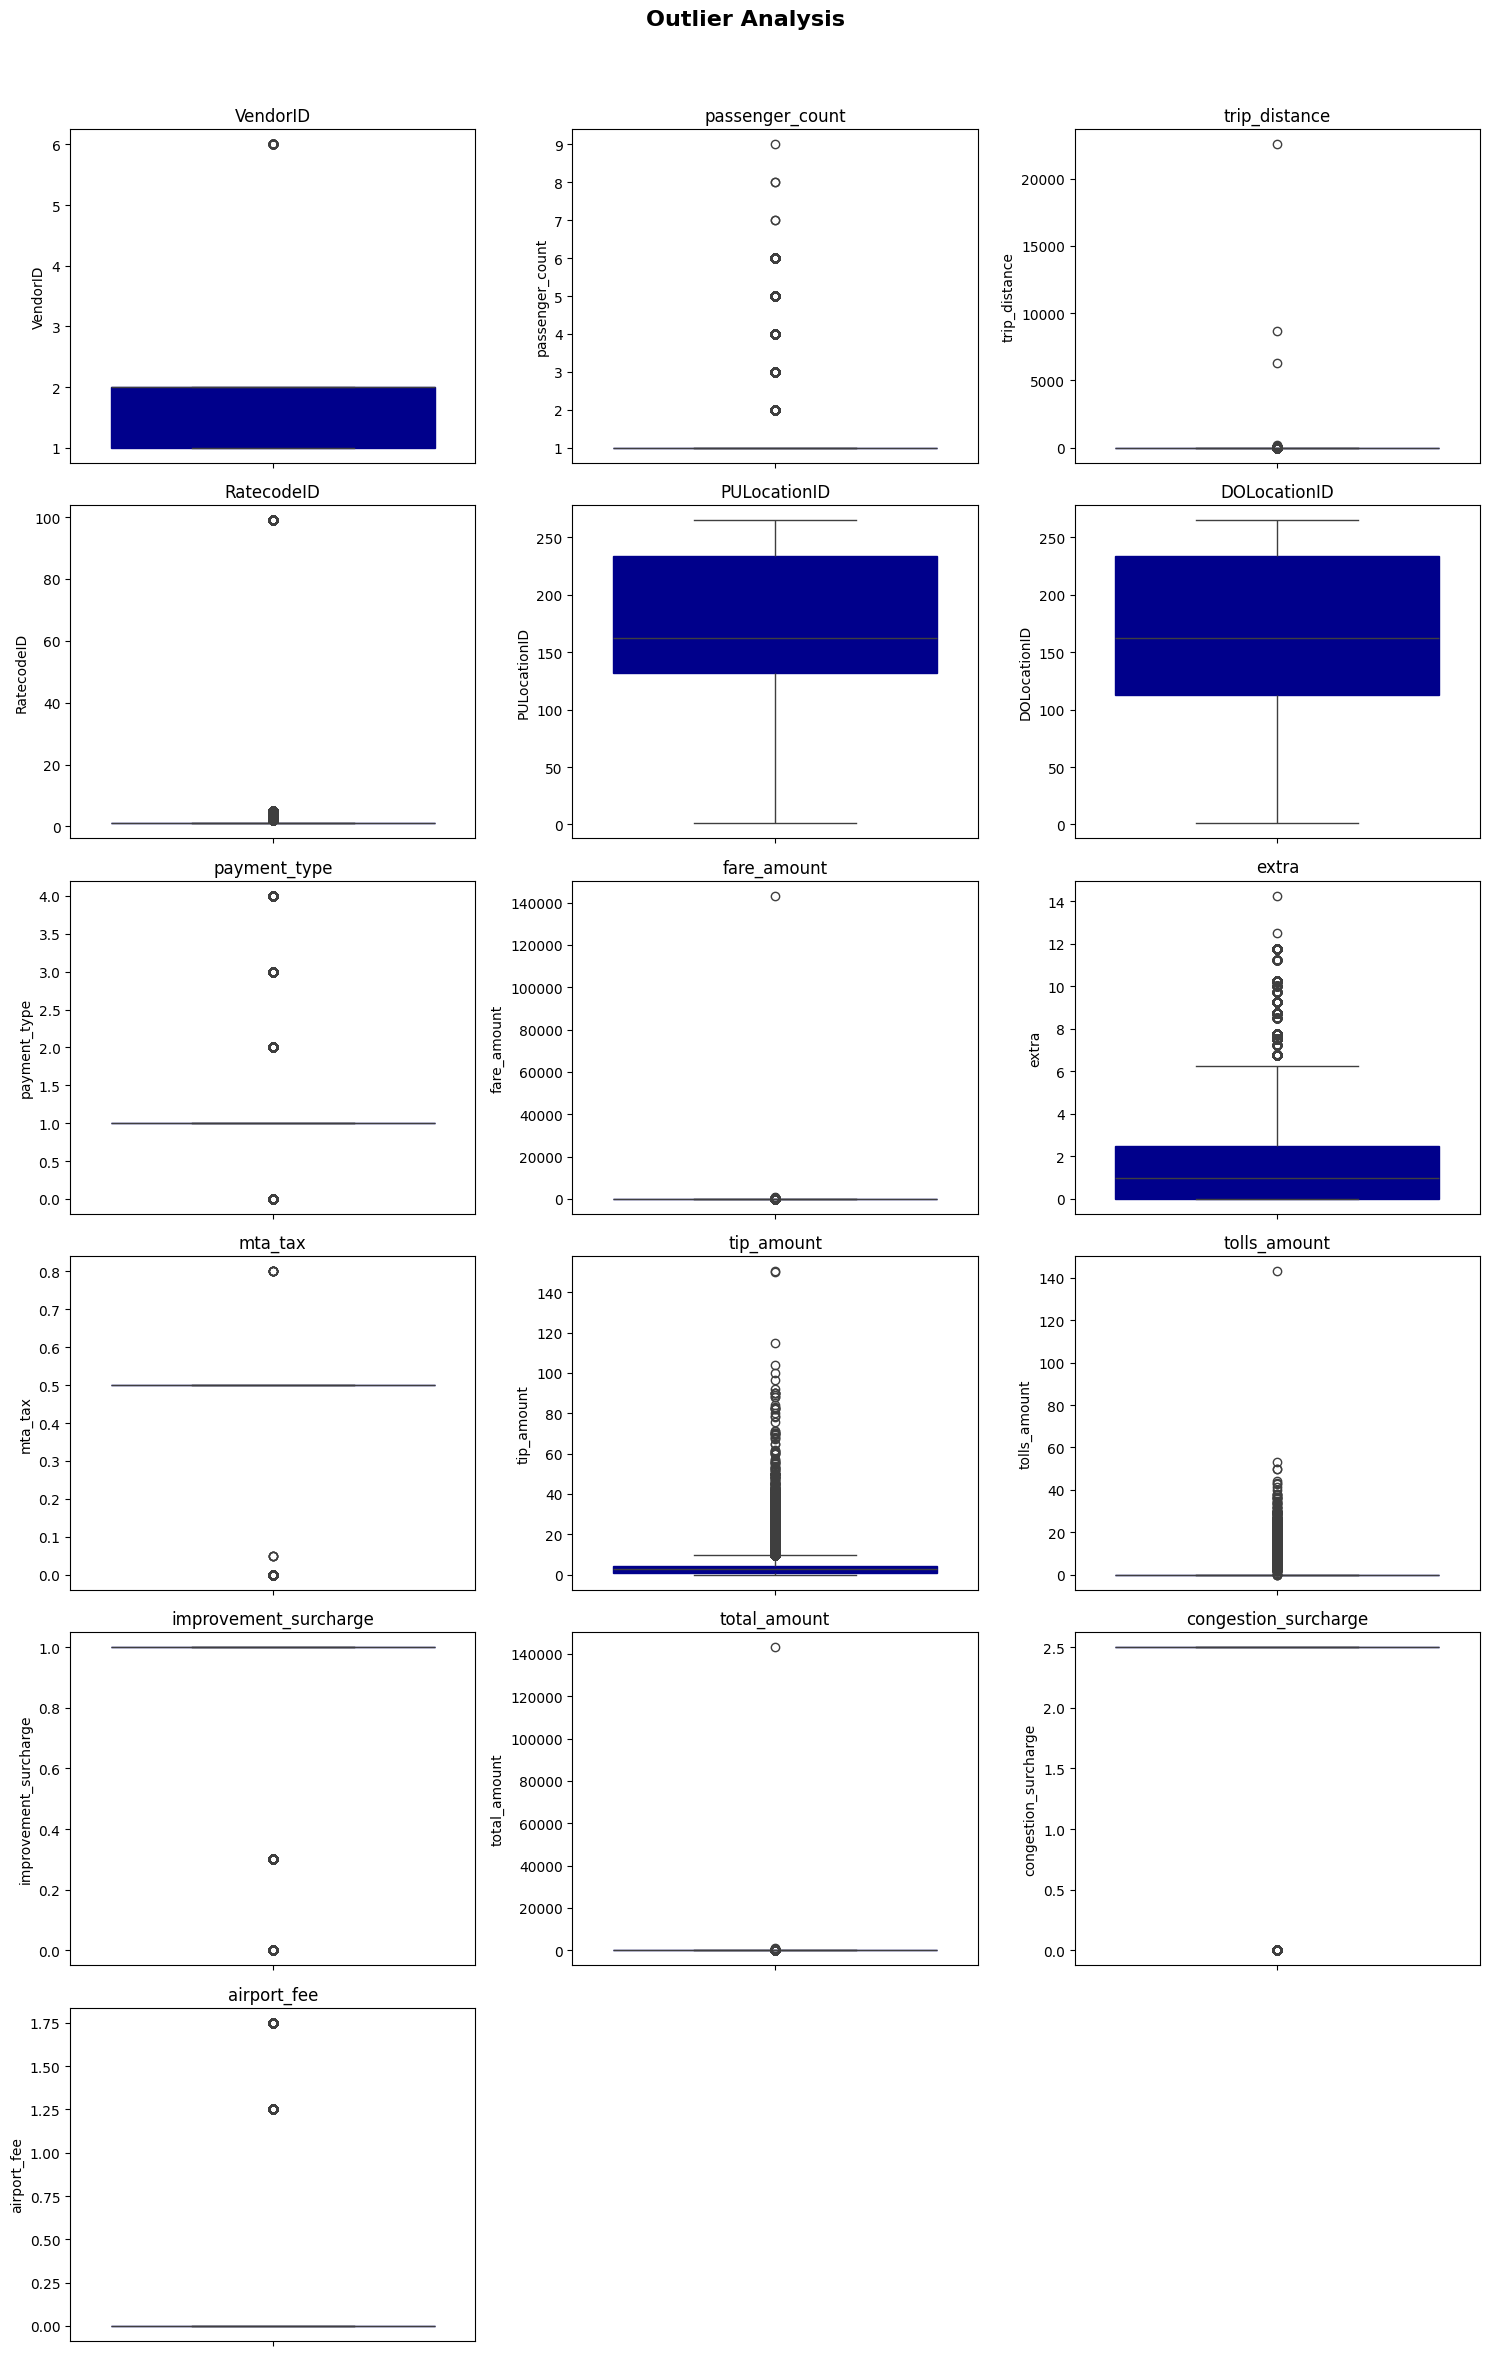

In [78]:
numeric_cols = taxi_data.select_dtypes(include=['number'])
num_cols = len(numeric_cols.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  
fig.suptitle("Outlier Analysis", fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(data=numeric_cols[col], ax=axes[i],
                boxprops=dict(facecolor='skyblue', color='darkblue'))
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")  # Remove x-labels for clarity
    axes[i].set_ylabel(col, fontsize=10)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [82]:
# remove passenger_count > 6
taxi_data = taxi_data[taxi_data['passenger_count'] <= 6]

In [83]:
# Handling Outliers in passenger_count

In [84]:
taxi_data[taxi_data['passenger_count'] > 6]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [85]:
# Continue with outlier handling
taxi_data.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  303833.000000                      303833                      303833   
mean        1.733745  2023-07-02 21:15:59.391352  2023-07-02 21:33:18.941688   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000         2023-04-02 16:47:59         2023-04-02 17:11:47   
50%         2.000000         2023-06-27 16:24:24         2023-06-27 16:44:54   
75%         2.000000         2023-10-06 21:11:35         2023-10-06 21:26:38   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447476                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    303833.000000  303833.000000  303833.000000  303833.000000   
mean          1.369838       3.557800       1.628589     165.253952   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           6.000000   22528.820000      99.000000     265.000000   
std           0.862435      45.453302       7.372184      64.050700   

        DOLocationID   payment_type    fare_amount          extra  \
count  303833.000000  303833.000000  303833.000000  303833.000000   
mean      163.922309       1.164732      20.277962       1.586542   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.795104       0.507183     260.323561       1.823700   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  303833.000000  303833.000000  303833.000000          303833.000000   
mean        0.495362       3.543775       0.590414               0.999048   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000     143.000000               1.000000   
std         0.048002       4.045554       2.172424               0.028435   

        total_amount  congestion_surcharge    airport_fee  
count  303833.000000         303833.000000  303833.000000  
mean       29.331258              2.315227       0.137246  
min         0.000000              0.000000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        30.800000              2.500000       0.000000  
max    143167.450000              2.500000       1.750000  
std       260.671533              0.654058       0.456135

In [86]:
# Entries where trip_distance ≈ 0 and fare_amount > 300
print("Total entries where trip_distance ≈ 0 and fare_amount > 300:-",((taxi_data['trip_distance'] < 0.1) & (taxi_data['fare_amount'] > 300)).sum())
taxi_data[((taxi_data['trip_distance'] < 0.1) & (taxi_data['fare_amount'] > 300))]

Total entries where trip_distance ≈ 0 and fare_amount > 300:- 6


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
85280          2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
102081         2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   
150282         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
157593         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
187422         1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
208805         2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
85280             0.0         5.0           265           265             2   
102081            0.0         5.0            14            14             1   
150282            0.0         5.0           265           265             2   
157593            0.0         5.0           265           265             1   
187422            0.0         5.0           246           246             4   
208805            0.0         5.0           265           265             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
85280         319.0    0.0      0.0         0.0           0.0   
102081        417.0    0.0      0.0         0.0           0.0   
150282        500.0    0.0      0.0         0.0           0.0   
157593        350.0    0.0      0.0        70.2           0.0   
187422        910.0    0.0      0.0         0.0           0.0   
208805        600.0    0.0      0.0         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
85280                     1.0         320.0                   0.0          0.0  
102081                    1.0         418.0                   0.0          0.0  
150282                    1.0         501.0                   0.0          0.0  
157593                    1.0         421.2                   0.0          0.0  
187422                    1.0         911.0                   0.0          0.0  
208805                    1.0         601.0                   0.0          0.0

In [87]:
taxi_data = taxi_data[~((taxi_data['trip_distance'] < 0.1) & (taxi_data['fare_amount'] > 300))]

In [88]:
taxi_data[((taxi_data['trip_distance'] < 0.1) & (taxi_data['fare_amount'] > 300))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [89]:
# Entries where trip_distance = 0 and fare_amount = 0, but pickup & dropoff locations are different

In [90]:
taxi_data[((taxi_data['trip_distance'] == 0) & (taxi_data['fare_amount'] == 0) & (taxi_data['PULocationID'] != taxi_data['DOLocationID']))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
95647          1  2023-12-18 09:31:12   2023-12-18 09:31:12              1.0   
97627          1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
101722         1  2023-12-27 20:51:43   2023-12-27 21:00:02              3.0   
180932         1  2023-02-01 08:20:36   2023-02-01 08:20:36              6.0   
181297         2  2023-02-01 16:53:34   2023-02-01 16:54:13              1.0   
227767         2  2023-04-28 13:52:30   2023-04-28 14:43:03              1.0   
232175         1  2023-05-02 17:42:04   2023-05-02 17:42:04              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
95647             0.0         5.0           138           264             3   
97627             0.0         5.0           138           264             2   
101722            0.0         5.0           132           215             4   
180932            0.0        99.0           145           264             2   
181297            0.0         1.0           193             7             1   
227767            0.0         1.0           264           255             2   
232175            0.0         5.0            75           264             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
95647           0.0   0.00      0.0         0.0           0.0   
97627           0.0   9.25      0.0         0.0           0.0   
101722          0.0   1.75      0.0         0.0           0.0   
180932          0.0   0.00      0.0         0.0           0.0   
181297          0.0   0.00      0.0         0.0           0.0   
227767          0.0   0.00      0.5         0.0           0.0   
232175          0.0   0.00      0.0         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
95647                     0.0          0.00                   0.0         0.00  
97627                     1.0         10.25                   2.5         1.75  
101722                    1.0          2.75                   0.0         1.75  
180932                    0.0          0.00                   0.0         0.00  
181297                    0.0          0.00                   0.0         0.00  
227767                    1.0          5.75                   2.5         1.75  
232175                    0.0          0.00                   0.0         0.00

In [91]:
taxi_data = taxi_data[~((taxi_data['trip_distance'] == 0) & (taxi_data['fare_amount'] == 0) & (taxi_data['PULocationID'] != taxi_data['DOLocationID']))]

In [92]:
taxi_data[((taxi_data['trip_distance'] == 0) & (taxi_data['fare_amount'] == 0) & (taxi_data['PULocationID'] != taxi_data['DOLocationID']))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [93]:
# Entries where trip_distance > 250 miles
taxi_data[taxi_data['trip_distance'] >250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
143217         2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   
194295         2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
197483         2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
143217       22528.82         1.0           116           239             0   
194295        8645.77         1.0           238           230             0   
197483        6284.45         1.0           186           236             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
143217        17.42    0.0      0.5        0.37           0.0   
194295        13.34    0.0      0.5        4.34           0.0   
197483        16.00    0.0      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
143217                    1.0         21.79                   2.5          0.0  
194295                    1.0         21.68                   2.5          0.0  
197483                    1.0         20.00                   2.5          0.0

In [94]:
taxi_data = taxi_data[taxi_data['trip_distance'] <= 250]

In [95]:
taxi_data[taxi_data['trip_distance'] >250]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [96]:
#Entries where payment_type = 0
taxi_data[taxi_data['payment_type'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
45             2  2023-01-01 01:46:00   2023-01-01 02:15:00              1.0   
46             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
61             2  2023-01-01 01:18:30   2023-01-01 01:46:19              1.0   
...          ...                  ...                   ...              ...   
303776         2  2023-05-18 19:15:00   2023-05-18 20:06:00              1.0   
303807         2  2023-09-08 17:36:51   2023-09-08 18:08:14              1.0   
303815         1  2023-09-13 17:54:38   2023-09-13 18:11:39              1.0   
303819         1  2023-09-14 18:01:04   2023-09-14 18:29:17              1.0   
303823         1  2023-09-15 18:49:07   2023-09-15 18:59:38              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4               19.24         1.0            66           107             0   
15              10.77         1.0           151           106             0   
45               4.97         1.0            50           226             0   
46               5.73         1.0           186           255             0   
61               2.98         1.0           137            48             0   
...               ...         ...           ...           ...           ...   
303776           8.20         1.0           237            17             0   
303807           3.04         1.0            43            48             0   
303815           0.00         1.0           186            48             0   
303819           2.50         1.0           142           234             0   
303823           0.00         1.0            68           107             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4             25.64    0.0      0.5        5.93          0.00   
15            45.38    0.0      0.5       11.19          6.55   
45            27.62    0.0      0.5        6.32          0.00   
46            27.32    0.0      0.5        6.26          0.00   
61            27.54    0.0      0.5        3.15          0.00   
...             ...    ...      ...         ...           ...   
303776        39.72    0.0      0.5        6.56          0.00   
303807        27.53    0.0      0.5        6.31          0.00   
303815        21.83    0.0      0.5        0.00          0.00   
303819        24.70    2.5      0.5        4.68          0.00   
303823        16.63    0.0      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
4                         1.0         35.57                   2.5          0.0  
15                        1.0         67.12                   2.5          0.0  
45                        1.0         37.94                   2.5          0.0  
46                        1.0         37.58                   2.5          0.0  
61                        1.0         34.69                   2.5          0.0  
...                       ...           ...                   ...          ...  
303776                    1.0         50.28                   2.5          0.0  
303807                    1.0         37.84                   2.5          0.0  
303815                    1.0         25.83                   2.5          0.0  
303819                    1.0         35.88                   2.5          0.0  
303823                    1.0         20.63                   2.5          0.0  

[10200 rows x 18 columns]

In [97]:
taxi_data[taxi_data['payment_type'] == 0].describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  10200.000000                       10200                       10200   
mean       1.637745  2023-07-30 08:49:41.260588  2023-07-30 09:08:54.276274   
min        1.000000         2023-01-01 00:41:50         2023-01-01 01:01:00   
25%        1.000000         2023-04-30 09:37:23         2023-04-30 09:52:29   
50%        2.000000         2023-08-19 03:56:10  2023-08-19 04:18:23.500000   
75%        2.000000  2023-10-30 10:02:22.500000  2023-10-30 10:16:02.250000   
max        6.000000         2023-12-31 23:29:15         2023-12-31 23:52:33   
std        0.613320                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count          10200.0   10200.000000     10200.0  10200.000000  10200.000000   
mean               1.0       3.398146         1.0    160.665392    156.036569   
min                1.0       0.000000         1.0      1.000000      1.000000   
25%                1.0       0.507500         1.0    107.000000    107.000000   
50%                1.0       2.100000         1.0    161.000000    152.000000   
75%                1.0       4.400000         1.0    234.000000    231.000000   
max                1.0      34.030000         1.0    265.000000    265.000000   
std                0.0       4.220191         0.0     72.147589     70.662837   

       payment_type   fare_amount         extra       mta_tax    tip_amount  \
count       10200.0  10200.000000  10200.000000  10200.000000  10200.000000   
mean            0.0     22.387383      0.168338      0.493971      2.730825   
min             0.0      0.000000      0.000000      0.000000      0.000000   
25%             0.0     12.900000      0.000000      0.500000      0.000000   
50%             0.0     18.580000      0.000000      0.500000      2.000000   
75%             0.0     27.530000      0.000000      0.500000      4.030000   
max             0.0    196.820000      9.250000      0.500000     40.000000   
std             0.0     14.075697      0.729542      0.054577      3.419891   

       tolls_amount  improvement_surcharge  total_amount  \
count  10200.000000           10200.000000  10200.000000   
mean       0.602609               0.990892     29.642204   
min        0.000000               0.000000      0.000000   
25%        0.000000               1.000000     18.860000   
50%        0.000000               1.000000     24.590000   
75%        0.000000               1.000000     34.690000   
max       25.000000               1.000000    215.570000   
std        2.251677               0.086257     17.482422   

       congestion_surcharge  airport_fee  
count               10200.0      10200.0  
mean                    2.5          0.0  
min                     2.5          0.0  
25%                     2.5          0.0  
50%                     2.5          0.0  
75%                     2.5          0.0  
max                     2.5          0.0  
std                     0.0          0.0

In [98]:
#Drop If trip_distance == 0 and fare_amount == 0, drop these rows:
taxi_data = taxi_data[~((taxi_data['trip_distance'] == 0) & (taxi_data['fare_amount'] == 0))]

In [99]:
taxi_data[((taxi_data['payment_type'] == 0) &(taxi_data['trip_distance'] == 0) & (taxi_data['fare_amount'] == 0))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [100]:
taxi_data[taxi_data['payment_type'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
45             2  2023-01-01 01:46:00   2023-01-01 02:15:00              1.0   
46             2  2023-01-01 01:10:00   2023-01-01 01:41:00              1.0   
61             2  2023-01-01 01:18:30   2023-01-01 01:46:19              1.0   
...          ...                  ...                   ...              ...   
303776         2  2023-05-18 19:15:00   2023-05-18 20:06:00              1.0   
303807         2  2023-09-08 17:36:51   2023-09-08 18:08:14              1.0   
303815         1  2023-09-13 17:54:38   2023-09-13 18:11:39              1.0   
303819         1  2023-09-14 18:01:04   2023-09-14 18:29:17              1.0   
303823         1  2023-09-15 18:49:07   2023-09-15 18:59:38              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4               19.24         1.0            66           107             0   
15              10.77         1.0           151           106             0   
45               4.97         1.0            50           226             0   
46               5.73         1.0           186           255             0   
61               2.98         1.0           137            48             0   
...               ...         ...           ...           ...           ...   
303776           8.20         1.0           237            17             0   
303807           3.04         1.0            43            48             0   
303815           0.00         1.0           186            48             0   
303819           2.50         1.0           142           234             0   
303823           0.00         1.0            68           107             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4             25.64    0.0      0.5        5.93          0.00   
15            45.38    0.0      0.5       11.19          6.55   
45            27.62    0.0      0.5        6.32          0.00   
46            27.32    0.0      0.5        6.26          0.00   
61            27.54    0.0      0.5        3.15          0.00   
...             ...    ...      ...         ...           ...   
303776        39.72    0.0      0.5        6.56          0.00   
303807        27.53    0.0      0.5        6.31          0.00   
303815        21.83    0.0      0.5        0.00          0.00   
303819        24.70    2.5      0.5        4.68          0.00   
303823        16.63    0.0      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
4                         1.0         35.57                   2.5          0.0  
15                        1.0         67.12                   2.5          0.0  
45                        1.0         37.94                   2.5          0.0  
46                        1.0         37.58                   2.5          0.0  
61                        1.0         34.69                   2.5          0.0  
...                       ...           ...                   ...          ...  
303776                    1.0         50.28                   2.5          0.0  
303807                    1.0         37.84                   2.5          0.0  
303815                    1.0         25.83                   2.5          0.0  
303819                    1.0         35.88                   2.5          0.0  
303823                    1.0         20.63                   2.5          0.0  

[10197 rows x 18 columns]

In [101]:
#Assign the most common valid payment_type to these rows:
most_common_payment = taxi_data.loc[taxi_data['payment_type'] != 0, 'payment_type'].mode()[0]
taxi_data['payment_type'].replace(0, most_common_payment, inplace=True)

In [102]:
taxi_data[taxi_data['payment_type'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [103]:
# Do any columns need standardising?
# Handling high toll amount
taxi_data[taxi_data['tolls_amount']>100]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
222479         1  2023-04-20 18:45:45   2023-04-20 18:46:08              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
222479            0.0         1.0           265           265             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
222479          3.0    2.5      0.5         5.0         143.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
222479                    1.0         155.0                   0.0          0.0

In [104]:
taxi_data = taxi_data[taxi_data['tolls_amount']<100]

In [105]:
taxi_data[taxi_data['tolls_amount']>100]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [106]:
taxi_data[taxi_data['RatecodeID']>6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
263            1  2023-01-01 11:39:40   2023-01-01 11:55:59              1.0   
679            1  2023-01-02 09:23:09   2023-01-02 09:38:34              1.0   
792            1  2023-01-02 13:09:05   2023-01-02 13:25:32              1.0   
1407           1  2023-01-03 13:07:10   2023-01-03 13:42:25              1.0   
1485           1  2023-01-03 15:30:26   2023-01-03 16:39:39              1.0   
...          ...                  ...                   ...              ...   
301850         1  2023-09-29 09:12:09   2023-09-29 10:23:24              1.0   
302670         1  2023-09-30 09:26:28   2023-09-30 09:37:34              1.0   
302759         1  2023-09-30 11:37:35   2023-09-30 11:54:06              1.0   
302778         1  2023-09-30 12:58:43   2023-09-30 13:17:16              1.0   
302999         1  2023-09-30 16:27:07   2023-09-30 17:09:46              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
263               2.9        99.0            42            47             1   
679               0.8        99.0           179             7             1   
792               6.9        99.0           137            42             1   
1407              0.0        99.0            14           216             1   
1485             13.0        99.0           141            35             1   
...               ...         ...           ...           ...           ...   
301850            7.1        99.0           113            74             1   
302670            1.8        99.0           102           160             1   
302759            2.9        99.0           220           235             1   
302778            1.8        99.0             4           158             1   
302999            8.5        99.0            62           216             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
263            22.5    0.0      0.5         0.0          0.00   
679            15.2    0.0      0.5         0.0          0.00   
792            31.5    0.0      0.5         0.0          0.00   
1407           46.5    0.0      0.5         0.0          0.00   
1485           55.5    0.0      0.5         0.0          6.55   
...             ...    ...      ...         ...           ...   
301850         30.5    0.0      0.5         0.0          0.00   
302670         17.5    0.0      0.5         0.0          0.00   
302759         18.5    0.0      0.5         0.0          0.00   
302778         18.5    0.0      0.5         0.0          0.00   
302999         30.5    0.0      0.5         0.0          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
263                       1.0         24.00                   0.0          0.0  
679                       1.0         16.70                   0.0          0.0  
792                       1.0         33.00                   0.0          0.0  
1407                      1.0         48.00                   0.0          0.0  
1485                      1.0         63.55                   0.0          0.0  
...                       ...           ...                   ...          ...  
301850                    1.0         32.00                   0.0          0.0  
302670                    1.0         19.00                   0.0          0.0  
302759                    1.0         20.00                   0.0          0.0  
302778                    1.0         20.00                   0.0          0.0  
302999                    1.0         32.00                   0.0          0.0  

[1725 rows x 18 columns]

In [107]:
# Find the mode (most common value) of RatecodeID
most_common_ratecode = taxi_data.loc[taxi_data['RatecodeID'] <= 6, 'RatecodeID'].mode()[0]

# Replace RatecodeID values greater than 6 with the mode
taxi_data.loc[taxi_data['RatecodeID'] > 6, 'RatecodeID'] = most_common_ratecode


In [108]:
taxi_data.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  303775.000000                      303775                      303775   
mean        1.733790  2023-07-02 21:19:53.382000  2023-07-02 21:37:13.098316   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000         2023-04-02 16:51:37  2023-04-02 17:18:39.500000   
50%         2.000000         2023-06-27 16:25:53         2023-06-27 16:48:55   
75%         2.000000  2023-10-06 21:13:35.500000         2023-10-06 21:26:59   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447454                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    303775.000000  303775.000000  303775.000000  303775.000000   
mean          1.369863       3.435168       1.071365     165.250551   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           6.000000     187.350000       5.000000     265.000000   
std           0.862415       4.513208       0.385568      64.049683   

        DOLocationID   payment_type    fare_amount          extra  \
count  303775.000000  303775.000000  303775.000000  303775.000000   
mean      163.916636       1.198166      20.271478       1.586778   
min         1.000000       1.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.793716       0.459571     260.337453       1.823674   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  303775.000000  303775.000000  303775.000000          303775.000000   
mean        0.495434       3.544044       0.590056               0.999157   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000      53.000000               1.000000   
std         0.047635       4.043320       2.157197               0.026463   

        total_amount  congestion_surcharge    airport_fee  
count  303775.000000         303775.000000  303775.000000  
mean       29.325383              2.315595       0.137234  
min         0.000000              0.000000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        30.800000              2.500000       0.000000  
max    143167.450000              2.500000       1.750000  
std       260.685245              0.653458       0.456114

In [109]:
taxi_data[taxi_data['tip_amount']>100]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
85951          2  2023-12-08 17:40:34   2023-12-08 19:18:35              1.0   
138074         1  2023-06-07 13:58:40   2023-06-07 14:05:58              1.0   
263058         1  2023-07-09 12:08:25   2023-07-09 12:39:10              3.0   
287228         1  2023-09-09 01:04:43   2023-09-09 01:28:40              3.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
85951           54.45         4.0           162           265             1   
138074           1.50         1.0            13            87             1   
263058          10.30         5.0           231           265             1   
287228           4.60         1.0            79            80             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
85951         332.7    2.5      0.5      103.84          6.94   
138074         10.0    2.5      0.5      150.29          0.00   
263058          0.0    0.0      0.0      115.00         21.75   
287228         26.1    3.5      0.5      150.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
85951                     1.0        449.98                   2.5          0.0  
138074                    1.0        164.29                   2.5          0.0  
263058                    1.0        137.75                   0.0          0.0  
287228                    1.0        181.10                   2.5          0.0

In [110]:
taxi_data[taxi_data['fare_amount'] <= 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7624           1  2023-01-11 16:47:59   2023-01-11 18:09:08              1.0   
12485          1  2023-01-17 15:23:25   2023-01-17 15:46:25              1.0   
23211          2  2023-01-30 15:47:07   2023-01-30 16:11:33              1.0   
35290          1  2023-10-12 16:42:29   2023-10-12 17:40:45              1.0   
54700          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
56795          2  2023-11-05 18:13:44   2023-11-05 18:14:10              1.0   
57108          2  2023-11-06 08:21:14   2023-11-06 08:26:23              1.0   
57682          2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
58267          2  2023-11-07 15:34:50   2023-11-07 15:35:29              1.0   
59991          1  2023-11-09 11:36:40   2023-11-09 11:37:10              1.0   
61962          1  2023-11-11 10:41:38   2023-11-11 11:49:05              1.0   
73104          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
82415          1  2023-12-05 09:07:28   2023-12-05 09:07:56              1.0   
97053          1  2023-12-19 19:25:04   2023-12-19 19:25:53              1.0   
103793         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
108537         1  2023-03-08 15:40:28   2023-03-08 17:05:56              1.0   
112021         1  2023-03-06 16:51:00   2023-03-06 17:00:23              1.0   
113464         1  2023-03-10 09:27:56   2023-03-10 09:54:47              3.0   
129600         1  2023-03-25 02:10:25   2023-03-25 02:10:50              1.0   
131339         1  2023-03-30 23:20:54   2023-03-30 23:21:12              1.0   
138132         1  2023-06-07 14:55:11   2023-06-07 14:57:31              1.0   
143219         2  2023-06-13 09:22:44   2023-06-13 09:31:41              1.0   
153809         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
157507         2  2023-06-29 19:37:01   2023-06-29 19:38:36              1.0   
158396         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
159700         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
171400         1  2023-08-18 14:57:27   2023-08-18 14:58:10              1.0   
177216         1  2023-08-26 20:08:42   2023-08-26 20:14:44              1.0   
178115         1  2023-08-28 09:29:47   2023-08-28 09:56:44              1.0   
186134         1  2023-02-07 16:06:43   2023-02-07 16:08:06              1.0   
193717         1  2023-02-16 14:48:44   2023-02-16 14:53:22              1.0   
197287         1  2023-02-19 17:16:38   2023-02-19 17:16:59              1.0   
200233         1  2023-02-24 14:22:52   2023-02-24 14:26:24              1.0   
207639         1  2023-04-10 15:37:59   2023-04-10 15:40:22              1.0   
208979         2  2023-04-11 07:37:23   2023-04-11 08:15:38              1.0   
210399         2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
215708         1  2023-04-13 10:21:11   2023-04-13 11:35:13              1.0   
222783         1  2023-04-20 23:59:40   2023-04-21 00:52:12              1.0   
226658         1  2023-04-27 11:59:34   2023-04-27 12:56:02              1.0   
227403         1  2023-04-27 23:10:47   2023-04-27 23:15:25              1.0   
230142         2  2023-05-01 09:38:07   2023-05-01 10:20:01              1.0   
233063         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
243990         1  2023-05-16 10:07:00   2023-05-16 11:12:39              1.0   
247143         1  2023-05-19 11:16:33   2023-05-19 11:49:15              1.0   
249072         2  2023-05-21 10:20:00   2023-05-21 10:34:00              1.0   
250723         1  2023-05-23 11:03:03   2023-05-23 11:07:15              1.0   
252794         2  2023-05-25 14:33:37   2023-05-25 15:21:23              1.0   
255035         2  2023-05-28 10:58:03   2023-05-28 11:08:40              1.0   
261062         1  2023-07-06 16:09:14   2023-07-06 16:25:41              1.0   
263058  

In [111]:
#Impute fare_amount == 0 for trips with trip_distance > 0
# Calculate median fare per mile
median_fare_per_mile = taxi_data[taxi_data['fare_amount'] > 0].groupby('trip_distance')['fare_amount'].median()

# Apply imputation
taxi_data.loc[(taxi_data['fare_amount'] == 0) & (taxi_data['trip_distance'] > 0), 'fare_amount'] = \
    taxi_data['trip_distance'].map(median_fare_per_mile)

In [112]:
taxi_data[taxi_data['fare_amount'] <= 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [113]:
taxi_data[taxi_data['fare_amount'] >500]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
283575         1  2023-09-05 10:16:13   2023-09-05 10:20:56              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
283575            0.7         1.0           249            90             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
283575    143163.45    2.5      0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
283575                    1.0     143167.45                   2.5          0.0

In [114]:
taxi_data = taxi_data[taxi_data['fare_amount'] < 500]

In [115]:
taxi_data.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  303771.000000                      303771                      303771   
mean        1.733799  2023-07-02 21:21:19.944649  2023-07-02 21:38:39.626191   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:52:32.500000  2023-04-02 17:18:49.500000   
50%         2.000000         2023-06-27 16:28:11         2023-06-27 16:51:35   
75%         2.000000         2023-10-06 21:15:47  2023-10-06 21:29:49.500000   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447449                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    303771.000000  303771.000000  303771.000000  303771.000000   
mean          1.369867       3.434736       1.071327     165.250603   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           6.000000     187.350000       5.000000     265.000000   
std           0.862420       4.510963       0.385373      64.049839   

        DOLocationID   payment_type    fare_amount          extra  \
count  303771.000000  303771.000000  303771.000000  303771.000000   
mean      163.915881       1.198149      19.804051       1.586791   
min         1.000000       1.000000       0.010000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     455.200000      14.250000   
std        69.793324       0.459546      18.000381       1.823678   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  303771.000000  303771.000000  303771.000000          303771.000000   
mean        0.495439       3.544090       0.589839               0.999157   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.290000      53.000000               1.000000   
std         0.047610       4.043327       2.156070               0.026463   

        total_amount  congestion_surcharge    airport_fee  
count  303771.000000         303771.000000  303771.000000  
mean       28.854233              2.315618       0.137236  
min         0.000000              0.000000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        30.800000              2.500000       0.000000  
max       488.700000              2.500000       1.750000  
std        22.582821              0.653422       0.456117

In [116]:
taxi_data.shape

(303771, 18)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [118]:
taxi_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

In [122]:
# Separating numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# Answer to above question
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']
Categorical columns: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']


**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

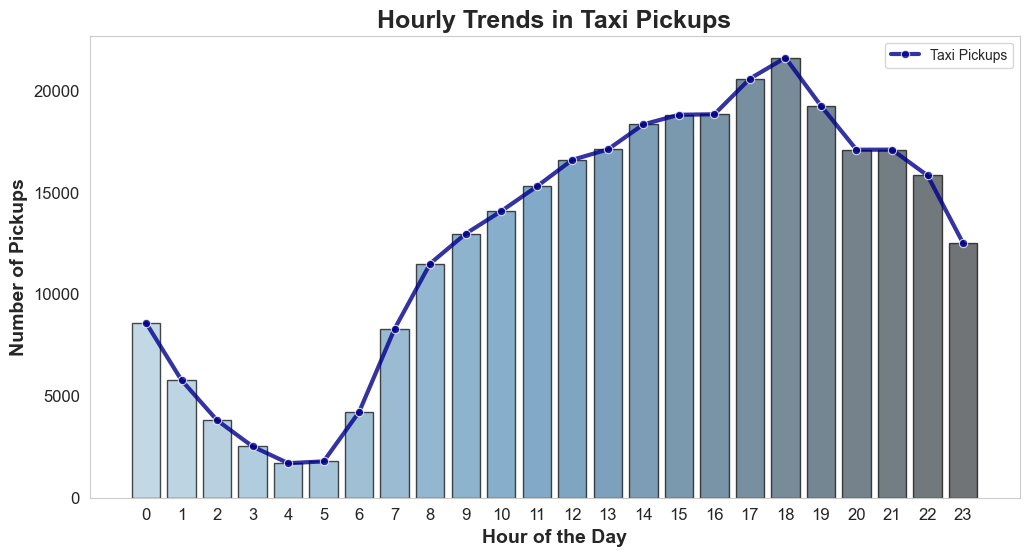

In [124]:
# Find and show the hourly trends in taxi pickups
taxi_data['pickup_hour'] = pd.to_datetime(taxi_data['tpep_pickup_datetime']).dt.hour
hourly_pickups = taxi_data.groupby("pickup_hour").size()

# Plot the hourly trends
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.set_palette("Spectral") 
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="Blues_d", edgecolor="black", alpha=0.7)
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, color='darkblue', marker='o', linewidth=3, alpha=0.8, label="Taxi Pickups")


# Labels and title
plt.xlabel('Hour of the Day', fontsize=14, fontweight='bold')
plt.ylabel('Number of Pickups', fontsize=14, fontweight='bold')
plt.title('Hourly Trends in Taxi Pickups', fontsize=18, fontweight='bold')
plt.xticks(range(24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.)

plt.show()

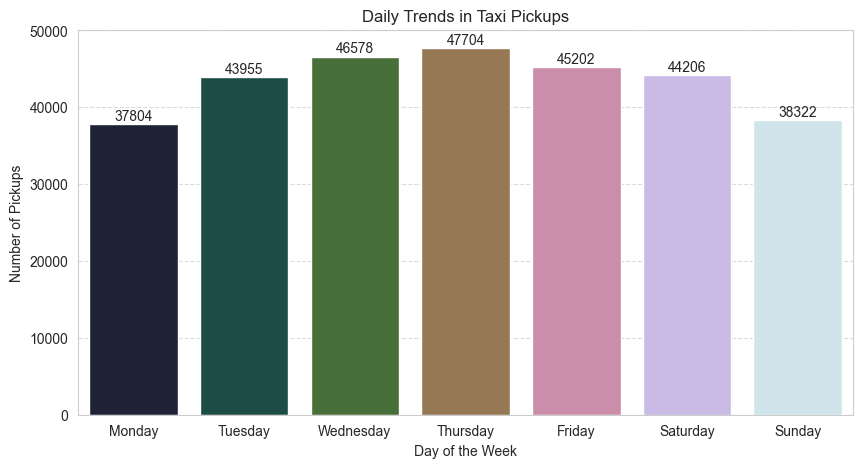

In [125]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract the day of the week (0=Monday, 6=Sunday)
taxi_data['pickup_day'] = pd.to_datetime(taxi_data['tpep_pickup_datetime']).dt.dayofweek

# Define day labels
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group by day and count pickups
daily_pickups = taxi_data.groupby('pickup_day').size()

# Plot the daily trends
plt.figure(figsize=(10, 5))
sns.barplot(x=days, y=daily_pickups.values, palette="cubehelix")

# Labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the values on top of bars
for i, val in enumerate(daily_pickups):
    plt.text(i, val + 500, str(val), ha='center', fontsize=10)

plt.show()

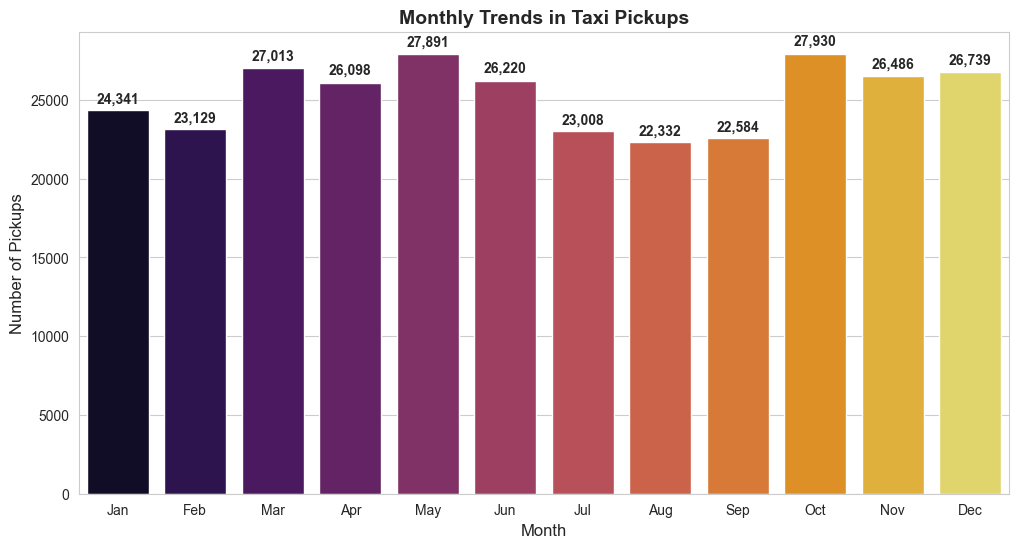

In [126]:
# Show the monthly trends in pickups

# Extract the month from datetime
taxi_data['pickup_month'] = pd.to_datetime(taxi_data['tpep_pickup_datetime']).dt.month

# Count pickups per month
monthly_pickups = taxi_data['pickup_month'].value_counts().sort_index()

# Plot the monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="inferno")

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.title("Monthly Trends in Taxi Pickups", fontsize=14, fontweight='bold')

# Correct x-axis labels
plt.xticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], fontsize=10)

# Show values on top of bars
for i, val in enumerate(monthly_pickups.values):
    plt.text(i, val * 1.02, f"{val:,}", ha='center', fontsize=10, fontweight='bold')

plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [129]:
# Analyse the above parameters
# List of financial columns to check
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero values
zero_counts = (taxi_data[financial_columns] == 0).sum()

# Count negative values
negative_counts = (taxi_data[financial_columns] < 0).sum()

# Display results
print("Zero Values in Financial Columns:")
print(zero_counts)
print("\nNegative Values in Financial Columns:")
print(negative_counts)



Zero Values in Financial Columns:
fare_amount          0
tip_amount       69783
total_amount        12
trip_distance     5955
dtype: int64

Negative Values in Financial Columns:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [131]:
# yes and done below the same

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [133]:
# Create a df with non zero entries for the selected parameters.
filter_columns = ["fare_amount", "total_amount", "trip_distance"]

# Count zero values before filtering
zero_counts_before = (taxi_data[filter_columns] == 0).sum()
print("Zero Values Before Filtering:")
print(zero_counts_before)

# Remove rows where fare_amount or total_amount is zero
filtered_taxi_data = taxi_data[
    (taxi_data["fare_amount"] > 0) & 
    (taxi_data["total_amount"] > 0)
]

# Handling trip_distance:
#Keep zero distances if fare > 0 (Uncomment to use this instead)
filtered_taxi_data = filtered_taxi_data[(filtered_taxi_data["trip_distance"] > 0) | (filtered_taxi_data["fare_amount"] > 0)]

# Count zero values after filtering
zero_counts_after = (filtered_taxi_data[filter_columns] == 0).sum()
print("\nZero Values After Filtering:")
print(zero_counts_after)


Zero Values Before Filtering:
fare_amount         0
total_amount       12
trip_distance    5955
dtype: int64

Zero Values After Filtering:
fare_amount         0
total_amount        0
trip_distance    5955
dtype: int64


In [134]:
filtered_taxi_data[(filtered_taxi_data[filter_columns] == 0).any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
57             2  2023-01-01 01:34:06   2023-01-01 01:34:14              2.0   
76             1  2023-01-01 01:25:41   2023-01-01 01:25:45              1.0   
82             1  2023-01-01 01:26:38   2023-01-01 01:27:12              1.0   
83             2  2023-01-01 01:20:00   2023-01-01 01:20:02              4.0   
132            2  2023-01-01 03:18:36   2023-01-01 03:18:42              1.0   
...          ...                  ...                   ...              ...   
303670         2  2023-06-28 18:17:06   2023-06-28 18:33:20              1.0   
303793         1  2023-07-12 18:31:51   2023-07-12 18:32:03              1.0   
303815         1  2023-09-13 17:54:38   2023-09-13 18:11:39              1.0   
303818         2  2023-09-14 17:35:18   2023-09-14 17:37:57              1.0   
303823         1  2023-09-15 18:49:07   2023-09-15 18:59:38              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
57                0.0         5.0           265           265             1   
76                0.0         1.0           148           148             1   
82                0.0         5.0           229           229             1   
83                0.0         5.0           264           264             1   
132               0.0         1.0           113           113             2   
...               ...         ...           ...           ...           ...   
303670            0.0         1.0           233           163             1   
303793            0.0         1.0           138           138             4   
303815            0.0         1.0           186            48             1   
303818            0.0         1.0           264           264             2   
303823            0.0         1.0            68           107             1   

        fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
57            50.00  ...      0.0       10.20           0.0   
76             3.00  ...      0.5       52.00           0.0   
82             5.00  ...      0.0        0.00           0.0   
83            45.00  ...      0.0        0.80           0.0   
132            3.00  ...      0.5        0.00           0.0   
...             ...  ...      ...         ...           ...   
303670        14.20  ...      0.5        4.14           0.0   
303793         3.00  ...      0.5        0.00           0.0   
303815        21.83  ...      0.5        0.00           0.0   
303818         3.00  ...      0.5        0.00           0.0   
303823        16.63  ...      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
57                        1.0         61.20                   0.0   
76                        1.0         60.00                   2.5   
82                        1.0          6.00                   0.0   
83                        1.0         46.80                   0.0   
132                       1.0          8.00                   2.5   
...                       ...           ...                   ...   
303670                    1.0         24.84                   2.5   
303793                    1.0         13.75                   0.0   
303815                    1.0         25.83                   2.5   
303818                    1.0          7.00                   0.0   
303823                    1.0         20.63                   2.5   

        airport_fee  pickup_hour  pickup_day  pickup_month  
57             0.00            1           6             1  
76             0.00            1           6             1  
82             0.00            1           6             1  
83             0.00            1           6             1  
132            0.00            3           6             1  
...             ...          ...         ...           ...  
303670         0.00           18           2             6  
303793         1.75     

In [135]:
filtered_taxi_data = filtered_taxi_data[~((filtered_taxi_data["trip_distance"] == 0) & (filtered_taxi_data["PULocationID"] != filtered_taxi_data["DOLocationID"]))]

In [136]:
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero values
(filtered_taxi_data[financial_columns] == 0).sum()

fare_amount          0
tip_amount       66886
total_amount         0
trip_distance     2471
dtype: int64

In [137]:
filtered_taxi_data.shape

(300275, 21)

In [138]:
filtered_taxi_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         1.0            66           107             1   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_hour  pickup_day  \
0         41.15                   0.0         1.25            0           6   
1         15.48                   2.5         0.00            0           6   
2         16.40                   2.5         0.00            0           6   
3         11.50                   2.5         0.00            0           6   
4         35.57                   2.5         0.00            0           6   

   pickup_month  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 21 columns]

In [139]:
filtered_taxi_data.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300275.000000                      300275                      300275   
mean        1.740381  2023-07-02 06:32:10.261983  2023-07-02 06:49:29.245435   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000         2023-04-02 03:34:24  2023-04-02 03:48:57.500000   
50%         2.000000         2023-06-26 14:51:13         2023-06-26 15:10:49   
75%         2.000000         2023-10-06 08:50:42         2023-10-06 09:06:30   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.444012                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    300275.000000  300275.000000  300275.000000  300275.000000   
mean          1.373314       3.474619       1.070828     165.346276   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.080000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.430000       1.000000     234.000000   
max           6.000000     187.350000       5.000000     265.000000   
std           0.865768       4.521806       0.381644      63.975548   

        DOLocationID   payment_type    fare_amount  ...        mta_tax  \
count  300275.000000  300275.000000  300275.000000  ...  300275.000000   
mean      163.968106       1.199117      19.773428  ...       0.495625   
min         1.000000       1.000000       0.010000  ...       0.000000   
25%       113.000000       1.000000       9.300000  ...       0.500000   
50%       162.000000       1.000000      13.500000  ...       0.500000   
75%       234.000000       1.000000      21.900000  ...       0.500000   
max       265.000000       4.000000     455.200000  ...       0.800000   
std        69.759652       0.459844      18.008459  ...       0.046638   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  300275.000000  300275.000000          300275.000000  300275.000000   
mean        3.574625       0.590575               0.999455      28.869479   
min         0.000000       0.000000               0.000000       1.000000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.860000       0.000000               1.000000      21.000000   
75%         4.460000       0.000000               1.000000      30.770000   
max       150.290000      53.000000               1.000000     488.700000   
std         4.043460       2.157744               0.020063      22.618737   

       congestion_surcharge    airport_fee    pickup_hour     pickup_day  \
count         300275.000000  300275.000000  300275.000000  300275.000000   
mean               2.318150       0.138584      14.279251       2.999814   
min                0.000000       0.000000       0.000000       0.000000   
25%                2.500000       0.000000      11.000000       1.000000   
50%                2.500000       0.000000      15.000000       3.000000   
75%                2.500000       0.000000      19.000000       5.000000   
max                2.500000       1.750000      23.000000       6.000000   
std                0.649274       0.458146       5.793330       1.927967   

        pickup_month  
count  300275.000000  
mean        6.521965  
min         1.000000  
25%         4.000000  
50%         6.000000  
75%        10.000000  
max        12.000000  
std         3.465693  

[8 rows x 21 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

pickup_month
1     664115.14
2     629621.85
3     755966.37
4     741916.61
5     817898.50
6     765469.20
7     657395.06
8     641363.55
9     665628.01
10    814388.10
11    750778.09
12    764242.41
Name: total_amount, dtype: float64


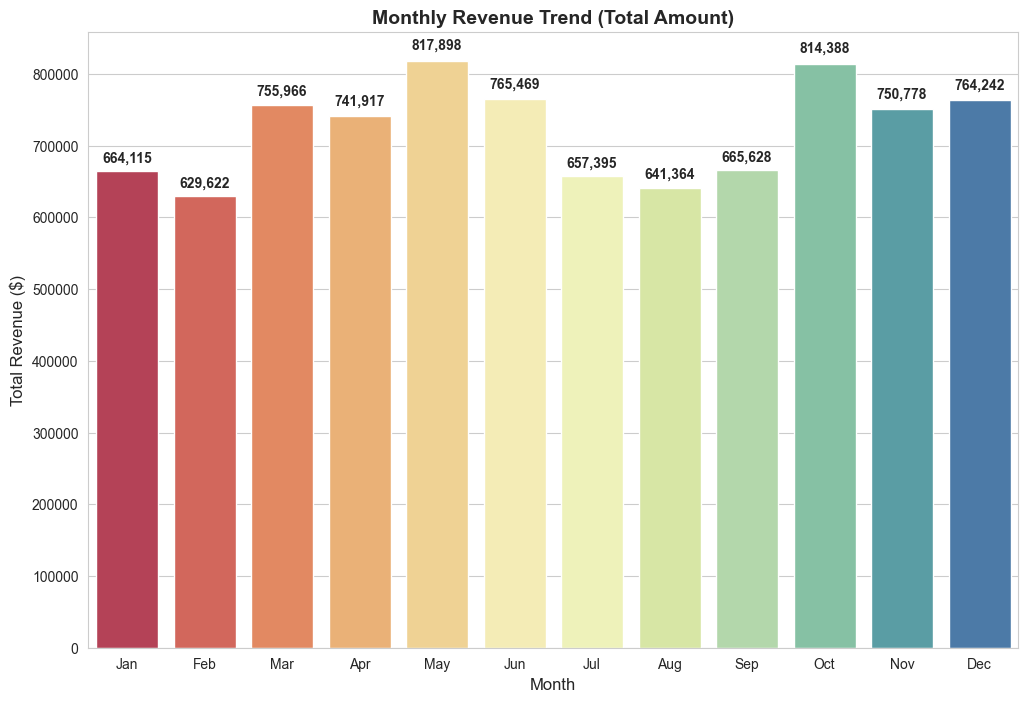

In [141]:
# Group data by month and analyse monthly revenue

# Group by month and calculate total revenue
monthly_revenue = filtered_taxi_data.groupby('pickup_month')['total_amount'].sum().sort_index()
print(monthly_revenue)
# Plot the revenue trend
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="Spectral", order=range(1, 13))

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Monthly Revenue Trend (Total Amount)", fontsize=14, fontweight='bold')

# Format x-axis labels
plt.xticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], fontsize=10)

# Show values on top of bars
for i, val in enumerate(monthly_revenue.values):
    plt.text(i, val * 1.02, f"{val:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.show()






**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

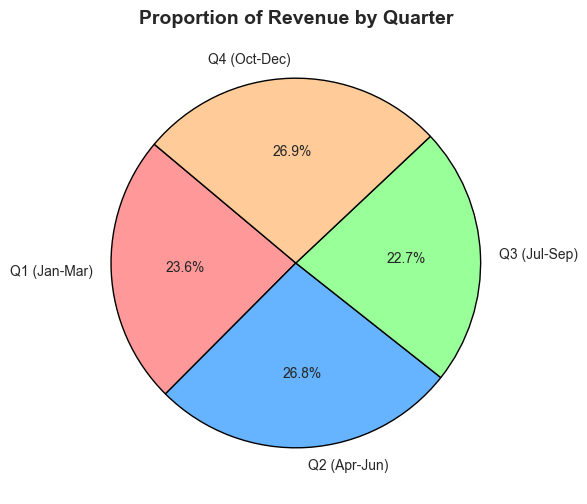

In [143]:
# Calculate proportion of each quarter
filtered_taxi_data['quarter'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime']).dt.quarter
quarterly_revenue = filtered_taxi_data.groupby('quarter')['total_amount'].sum()

# Define Labels and Colors
labels = ["Q1 (Jan-Mar)", "Q2 (Apr-Jun)", "Q3 (Jul-Sep)", "Q4 (Oct-Dec)"]
colors = ['#A8DADC', '#457B9D', '#1D3557', '#F1FAEE']
# Plot the Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(quarterly_revenue, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and Show
plt.title("Proportion of Revenue by Quarter", fontsize=14, fontweight='bold')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.9427


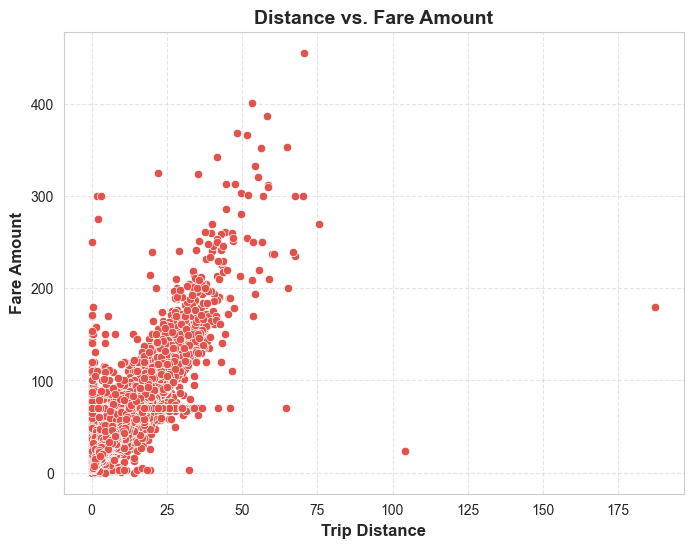

In [145]:
# Show how trip fare is affected by distance
# Step 1: Filter out invalid distances
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_distance'] > 0]

# Step 2: Compute correlation
correlation = filtered_df["trip_distance"].corr(filtered_df["fare_amount"])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

# Step 3: Create the figure
plt.figure(figsize=(8, 6))

# Step 4: Scatter plot with transparency for clarity
sns.scatterplot(
    x="trip_distance", 
    y="fare_amount", 
    data=filtered_df,
)
# Step 6: Customize labels and titles
plt.xlabel("Trip Distance", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')
plt.title("Distance vs. Fare Amount", fontsize=14, fontweight='bold')

# Step 7: Grid and Adjust Layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


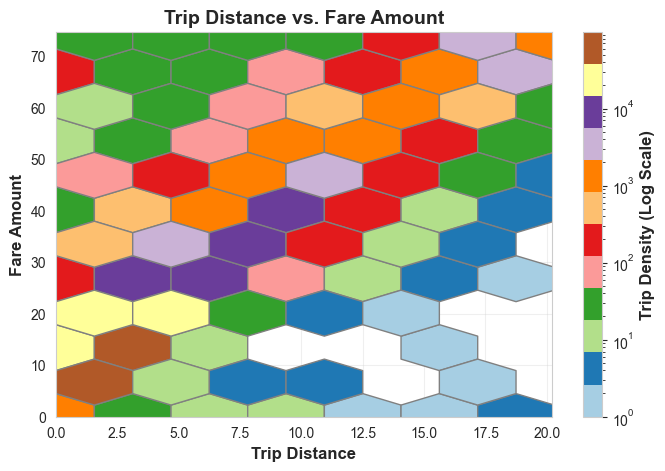

In [146]:
# Step 1: Create hexbin plot
plt.figure(figsize=(8, 5))

hb = plt.hexbin(
    filtered_df["trip_distance"], 
    filtered_df["fare_amount"], 
    gridsize=60,  # Increase for better detail
    cmap="Paired",  # More readable colors
    mincnt=1,  # Avoid empty bins
    edgecolors="gray",  # Improve hexagon visibility
    norm=mcolors.LogNorm()  # Log scale for density visibility
)

# Step 2: Add color bar
cb = plt.colorbar(hb, label="Density of Trips")
cb.set_label("Trip Density (Log Scale)", fontsize=12, fontweight="bold")

# Step 3: Customize axes and title
plt.xlabel("Trip Distance", fontsize=12, fontweight="bold")
plt.ylabel("Fare Amount", fontsize=12, fontweight="bold")
plt.title("Trip Distance vs. Fare Amount", fontsize=14, fontweight="bold")

# Step 4: Limit outliers
plt.xlim(0, filtered_df["trip_distance"].quantile(0.99))
plt.ylim(0, filtered_df["fare_amount"].quantile(0.99))

# Step 5: Add light grid
plt.grid(alpha=0.3)

# Step 6: Show the plot
plt.show()




**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip_duration and fare_amount: 0.27


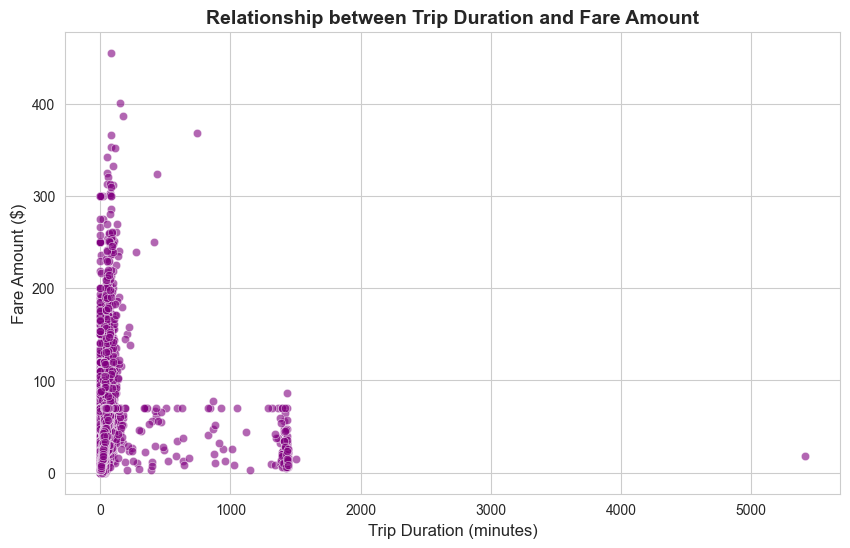

In [148]:
# Show relationship between fare and trip duration
# Calculate the trip duration in minutes
filtered_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime'])
filtered_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_dropoff_datetime'])
filtered_taxi_data['trip_duration'] = (filtered_taxi_data['tpep_dropoff_datetime'] - filtered_taxi_data['tpep_pickup_datetime']).dt.total_seconds() /60 # Convert to minutes

# Filter out rows with zero or negative duration (if any)
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_duration'] > 0]

# Calculate the correlation coefficient between trip_duration and fare_amount
correlation = filtered_df['trip_duration'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip_duration and fare_amount: {correlation:.2f}")

# Plot the scatter plot between fare amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['trip_duration'], y=filtered_df['fare_amount'], color='purple', alpha=0.6)

# Add labels and title
plt.xlabel("Trip Duration (minutes)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Relationship between Trip Duration and Fare Amount", fontsize=14, fontweight='bold')
# Show the plot
plt.show()

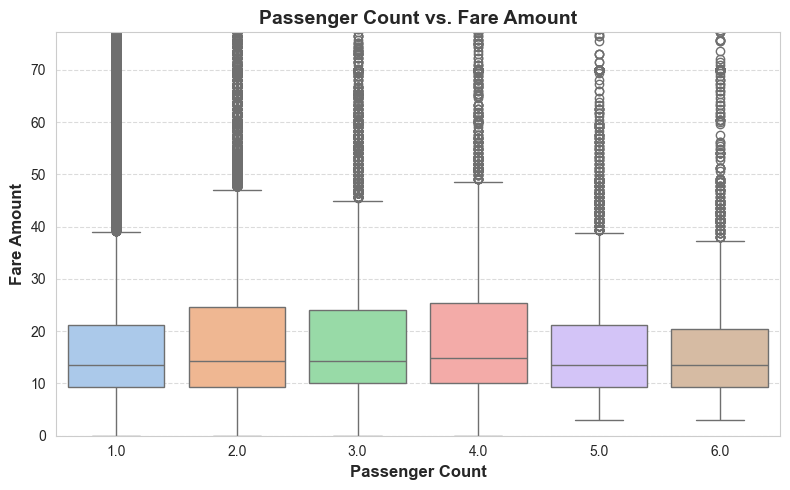

In [149]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    data=filtered_taxi_data, 
    x='passenger_count', 
    y='fare_amount', 
    palette="pastel", 
    showfliers=True
)
plt.ylim(0, filtered_taxi_data["fare_amount"].quantile(0.99))

# Add title and labels
plt.title("Passenger Count vs. Fare Amount", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Count", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


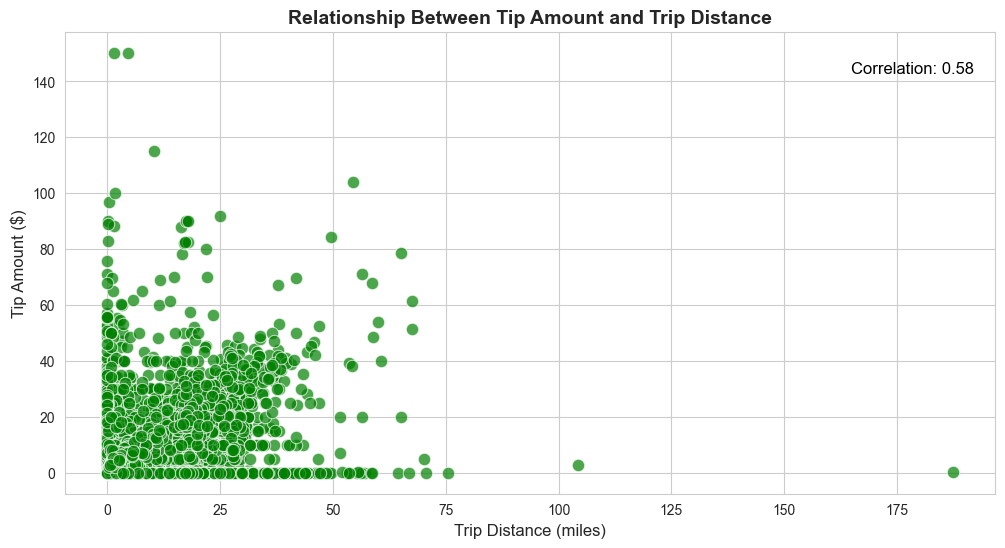

In [150]:
# Show relationship between tip and trip distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=filtered_taxi_data, color='green', s=80, alpha=0.7)

# Add labels and title
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.title('Relationship Between Tip Amount and Trip Distance', fontsize=14, fontweight='bold')

# Display correlation value
correlation = filtered_taxi_data['trip_distance'].corr(filtered_taxi_data['tip_amount'])
plt.figtext(0.78, 0.81, f'Correlation: {correlation:.2f}', fontsize=12, color='black')

plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5= Unknown
- 6= Voided Trip



In [153]:
# Analyse the distribution of different payment types (payment_type).
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}
filtered_taxi_data['payment_type'] = filtered_taxi_data['payment_type'].map(payment_type_mapping)
payment_counts = filtered_taxi_data['payment_type'].value_counts()
payment_percentage = filtered_taxi_data['payment_type'].value_counts(normalize=True) * 100
payment_counts

payment_type
Credit Card    246138
Cash            50636
Dispute          2152
No Charge        1349
Name: count, dtype: int64

In [154]:
payment_percentage

payment_type
Credit Card    81.970860
Cash           16.863209
Dispute         0.716676
No Charge       0.449255
Name: proportion, dtype: float64

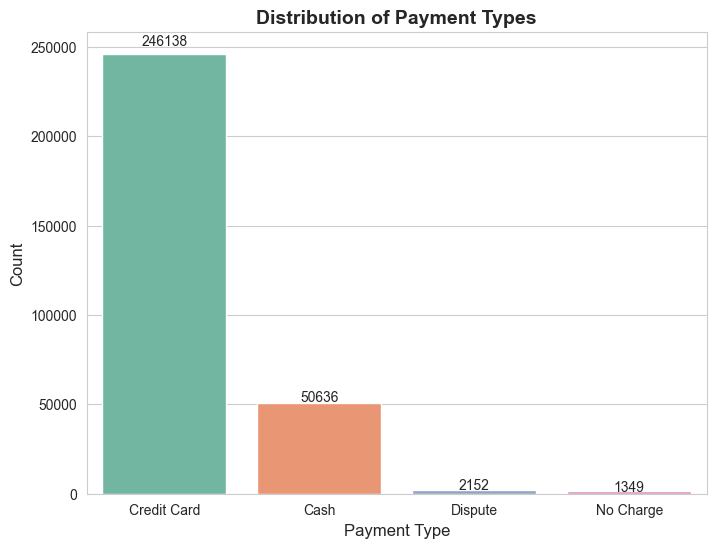

In [155]:
# Count the occurrences of each payment type
payment_type_counts = filtered_taxi_data['payment_type'].value_counts()

# Plot the distribution of payment types
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='Set2')

# Add labels and title
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Payment Types', fontsize=14, fontweight='bold')

# Show values on top of bars
for i, val in enumerate(payment_type_counts.values):
    plt.text(i, val * 1.02, str(val), ha='center', fontsize=10)

plt.show()


##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [159]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [161]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones/taxi_zones.shp")# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


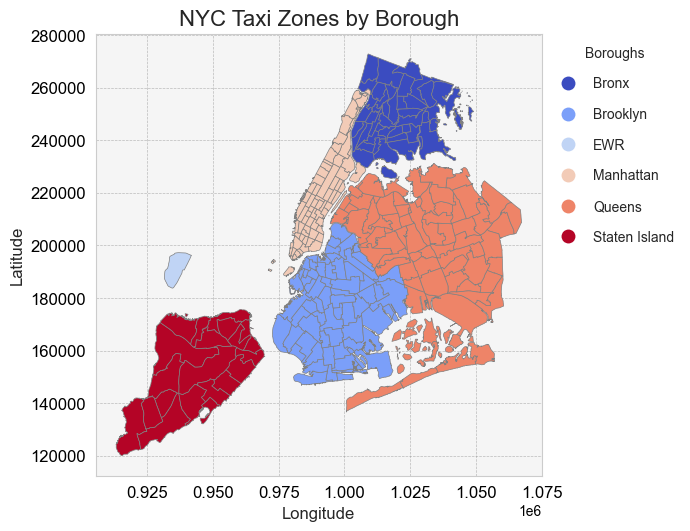

In [163]:
print(zones.info())
fig, ax = plt.subplots(figsize=(7, 7))

zones.plot(
    column="borough",
    cmap="coolwarm",
    edgecolor="gray",
    linewidth=0.5,
    legend=True,
    ax=ax,
    legend_kwds={
       'loc': 'upper left',           
        'bbox_to_anchor': (1, 1),     
        'title': 'Boroughs',           
        'fontsize': 10,                
        'frameon': False,              
        'labelspacing': 1.2           
    }
)

ax.set_title("NYC Taxi Zones by Borough", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)  # Light dashed grid
ax.set_facecolor('#f5f5f5')
ax.tick_params(axis='both', which='major', labelsize=12, width=1, colors='black')

plt.tight_layout()
plt.show()


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [166]:
# Merge zones and trip records using locationID and PULocationID
taxi_data_zones_merged = filtered_taxi_data.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Check the merged DataFrame
taxi_data_zones_merged.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID payment_type  \
0           7.74         1.0           138           256         Cash   
1           1.24         1.0           161           237  Credit Card   
2           1.44         1.0           237           141         Cash   
3           0.54         1.0           143           142         Cash   
4          19.24         1.0            66           107  Credit Card   

   fare_amount  ...  pickup_month  quarter  trip_duration  OBJECTID  \
0        32.40  ...             1        1      15.950000     138.0   
1         7.90  ...             1        1       5.083333     161.0   
2        11.40  ...             1        1      10.550000     237.0   
3         6.50  ...             1        1       5.416667     143.0   
4        25.64  ...             1        1      18.000000      66.0   

   Shape_Leng  Shape_Area                   zone  LocationID    borough  \
0    0.107467    0.000537      LaGuardia Airport       138.0     Queens   
1    0.035804    0.000072         Midtown Center       161.0  Manhattan   
2    0.042213    0.000096  Upper East Side South       237.0  Manhattan   
3    0.054180    0.000151    Lincoln Square West       143.0  Manhattan   
4    0.054633    0.000108     DUMBO/Vinegar Hill        66.0   Brooklyn   

                                            geometry  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  POLYGON ((990055.507 196472.349, 990004.46 196...  

[5 rows x 30 columns]

In [167]:
taxi_data_zones_merged.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_fee                 0
pickup_hour                 0
pickup_day                  0
pickup_month                0
quarter                     0
trip_duration               0
OBJECTID                 3037
Shape_Leng               3037
Shape_Area               3037
zone                     3037
LocationID               3037
borough                  3037
geometry                 3037
dtype: int64

In [168]:
taxi_data_zones_merged = taxi_data_zones_merged.dropna(subset=["zone"])

In [169]:
taxi_data_zones_merged.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_hour              0
pickup_day               0
pickup_month             0
quarter                  0
trip_duration            0
OBJECTID                 0
Shape_Leng               0
Shape_Area               0
zone                     0
LocationID               0
borough                  0
geometry                 0
dtype: int64

In [170]:
taxi_data_zones_merged.shape

(297259, 30)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [172]:
# Group data by PULocationID and count trips
trips_per_location = taxi_data_zones_merged.groupby("PULocationID").size().reset_index(name="num_trips")

# Merge with taxi_data_zones_merged to get zone names
trips_per_location = trips_per_location.merge(
    taxi_data_zones_merged[["PULocationID", "zone"]].drop_duplicates(),
    on="PULocationID",
    how="left"
)

# Sort by most popular locations
trips_per_location = trips_per_location.sort_values(by="num_trips", ascending=False)

# Display the top 10 locations with zone names
trips_per_location[['PULocationID','zone','num_trips']].head(10)

PULocationID                          zone  num_trips
116           132                   JFK Airport      15435
214           237         Upper East Side South      14065
144           161                Midtown Center      13909
213           236         Upper East Side North      12669
145           162                  Midtown East      10766
122           138             LaGuardia Airport      10215
165           186  Penn Station/Madison Sq West      10147
207           230     Times Sq/Theatre District       9912
126           142           Lincoln Square East       9849
153           170                   Murray Hill       8817

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [174]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values (for locations with no trips) with 0
zones["num_trips"] = zones["num_trips"].fillna(0)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips                   zone_y  
0           1.0       42.0           Newark Airport  
1           NaN        0.0                      NaN  
2           3.0        9.0  Allerton/Pelham Gardens  
3           4.0      338.0            Alphabet City  
4           5.0        2.0            Arden Heights

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

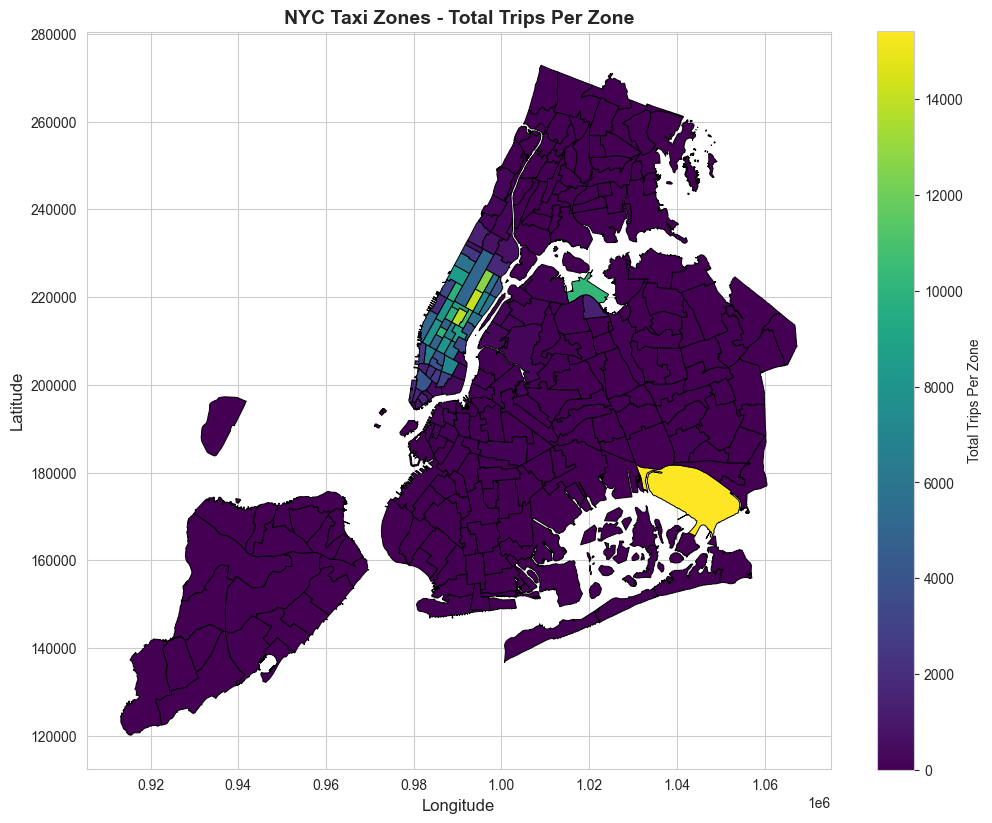

In [178]:
# Define figure and axis


# Plot the map and display it
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 20))

# Plot NYC taxi zones colored by the number of trips
zones.sort_values(by="num_trips", ascending=False).plot(column="num_trips", cmap="viridis", edgecolor="black", linewidth=0.7,
           legend=True, ax=ax, 
       legend_kwds={'label': "Total Trips Per Zone", 'orientation': "vertical",'shrink': 0.48})

# Title and labels
plt.title("NYC Taxi Zones - Total Trips Per Zone", fontsize=14, fontweight='bold')
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show plot
plt.show()



In [179]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips                   zone_y  
0           1.0       42.0           Newark Airport  
1           NaN        0.0                      NaN  
2           3.0        9.0  Allerton/Pelham Gardens  
3           4.0      338.0            Alphabet City  
4           5.0        2.0            Arden Heights

In [180]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by="num_trips", ascending=False)
zones_sorted[["LocationID", "borough", "zone_x", "num_trips"]].head(10)

LocationID    borough                        zone_x  num_trips
131         132     Queens                   JFK Airport    15435.0
236         237  Manhattan         Upper East Side South    14065.0
160         161  Manhattan                Midtown Center    13909.0
235         236  Manhattan         Upper East Side North    12669.0
161         162  Manhattan                  Midtown East    10766.0
137         138     Queens             LaGuardia Airport    10215.0
185         186  Manhattan  Penn Station/Madison Sq West    10147.0
229         230  Manhattan     Times Sq/Theatre District     9912.0
141         142  Manhattan           Lincoln Square East     9849.0
169         170  Manhattan                   Murray Hill     8817.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [189]:
# Find routes which have the slowest speeds at different times of the day

# Assume df_filtered contains pickup and dropoff details with timestamps
# Filter out rows where trip duration or speed is negative
taxi_data_zones_merged['trip_duration_hours'] = (taxi_data_zones_merged['tpep_dropoff_datetime'] - 
                                             taxi_data_zones_merged['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_filtered_clean = taxi_data_zones_merged[(taxi_data_zones_merged["trip_duration_hours"] > 0) & (taxi_data_zones_merged["trip_distance"] > 0)]

# Group by route and hour again with cleaned data
route_speed_clean = df_filtered_clean.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_duration=("trip_duration_hours", "mean"),  # Average trip duration per route-hour
    total_distance=("trip_distance", "mean")  # Total distance per route-hour
).reset_index()

# Compute speed (distance / avg duration)
route_speed_clean["avg_speed"] = route_speed_clean["total_distance"] / (route_speed_clean["avg_duration"] + 1e-5)  # Avoid division by zero

# Find the slowest routes (smallest speed)
slowest_routes_clean = route_speed_clean.sort_values(by="avg_speed", ascending=True).head(10)  # Adjust for top N slowest routes

# Display the cleaned slowest routes
slowest_routes_clean

PULocationID  DOLocationID  pickup_hour  avg_duration  total_distance  \
48128           226           145           18     45.165000            1.20   
17790           113           113           13      5.979236            0.23   
62432           260           129           17     23.560556            0.96   
46453           209           232           13     23.864722            1.04   
18365           113           235           22      5.820556            0.28   
5770             50            43            8     23.855556            1.42   
41044           164           100           21     11.647222            0.79   
24234           134           265           15      1.354444            0.10   
13061            88           144            0     23.757778            1.78   
44179           181           132           20     24.996944            2.29   

       avg_speed  
48128   0.026569  
17790   0.038466  
62432   0.040746  
46453   0.043579  
18365   0.048105  
5770    0.059525  
41044   0.067827  
24234   0.073830  
13061   0.074923  
44179   0.091611

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

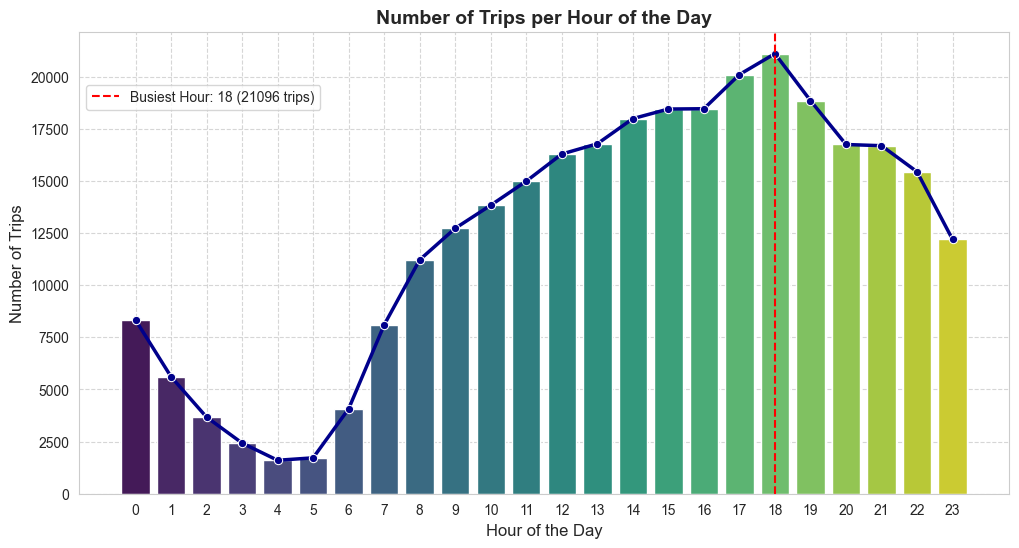

(18, 21096)

In [192]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = taxi_data_zones_merged.groupby('pickup_hour').size()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()  # Hour with max trips
busiest_hour_trips = trips_per_hour.max()  # Number of trips in that hour

# Create the figure
plt.figure(figsize=(12, 6))

# Bar plot for the number of trips per hour
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')

# Line plot to show the trend
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values, color="darkblue", marker="o",markersize=6, linewidth=2.5)

# Highlight the busiest hour with a vertical line
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)')

# Add labels and title
plt.title('Number of Trips per Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.8)
# Show the legend
plt.legend(loc="upper left", bbox_to_anchor=(0, 0.9), fontsize=10)

# Show the plot
plt.show()

# Return the busiest hour and its trip count
busiest_hour, busiest_hour_trips


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [195]:
# Scale up the number of trips
trip_count_per_hour = taxi_data_zones_merged.groupby('pickup_hour').size().reset_index(name='trip_count')

sample_fraction = 0.008  

# Fill in the value of your sampling fraction and use that to scale up the numbers
trip_count_per_hour['actual_trip_count'] = (trip_count_per_hour['trip_count'] / sample_fraction).astype(int)

# Find the five busiest hours
top_5_hours = trip_count_per_hour.nlargest(5, 'trip_count')

# Display results
top_5_hours

pickup_hour  trip_count  actual_trip_count
18           18       21096            2637000
17           17       20093            2511625
19           19       18846            2355750
16           16       18455            2306875
15           15       18440            2305000

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [197]:
# Compare traffic trends for the week days and weekends
taxi_data_zones_merged.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'quarter',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'trip_duration_hours']

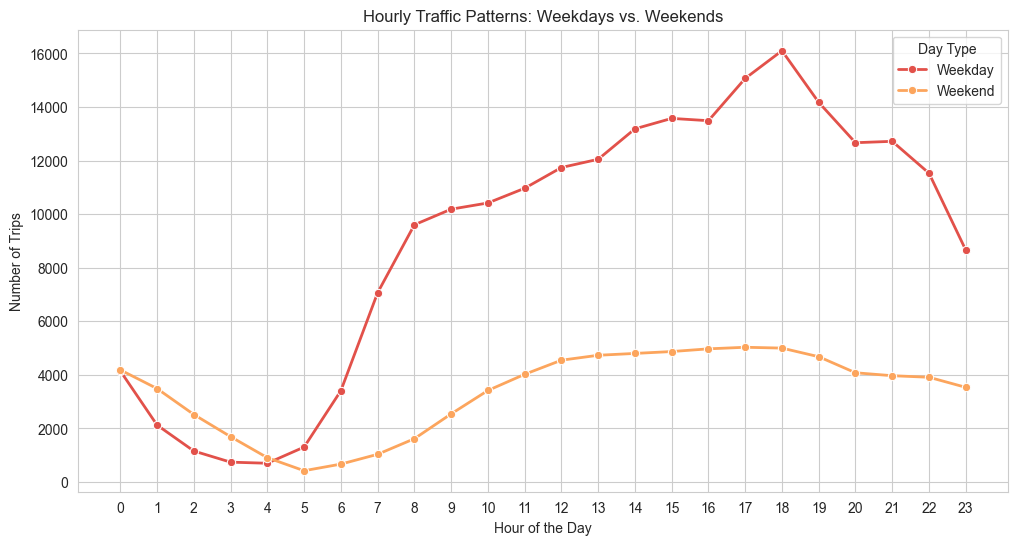

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate weekdays and weekends (Weekdays: 0-4, Weekends: 5-6)
weekdays = taxi_data_zones_merged[taxi_data_zones_merged['pickup_day'] <= 4]
weekends = taxi_data_zones_merged[taxi_data_zones_merged['pickup_day'] >= 5]

# Count the number of trips per hour for weekdays and weekends
weekday_counts = weekdays.groupby('pickup_hour').size()
weekend_counts = weekends.groupby('pickup_hour').size()

# Plot the data in one figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Weekday plot
sns.lineplot(x=weekday_counts.index, y=weekday_counts.values, marker='o', label="Weekday", linewidth=2)

# Weekend plot
sns.lineplot(x=weekend_counts.index, y=weekend_counts.values, marker='o', label="Weekend", linewidth=2)

# Titles and labels
plt.title("Hourly Traffic Patterns: Weekdays vs. Weekends")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))

# Legend
plt.legend(title="Day Type")

# Show the plot
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

### **Insights from the Hourly Traffic Patterns:**
1. **Weekday Trends:**
   - **Morning Peak:** A sharp increase in trips starts around **6 AM**, peaking between **8–9 AM** (typical rush hours).
   - **Evening Peak:** A second peak occurs between **5–7 PM**, aligning with people commuting home.
   - **Night Drop:** After 8 PM, trips decline significantly.

2. **Weekend Trends:**
   - No sharp morning peak; trips gradually increase until the afternoon.
   - **Peak between 12–6 PM**, likely due to leisure activities, shopping, and social events.
   - **Trips remain steady in the evening** compared to weekdays, with a slower decline at night.

### **Why Identifying Busy and Quiet Hours is Useful:**
✅ **For Businesses & Ride-Sharing Companies:**  
- Optimize fleet distribution, ensuring more drivers are available during peak hours.  
- Plan surge pricing dynamically to balance supply and demand.  

✅ **For City Planning & Traffic Management:**  
- Improve road infrastructure planning based on peak traffic times.  
- Adjust public transport schedules to accommodate demand.  

✅ **For Customers & Commuters:**  
- Avoid travel delays by choosing off-peak hours.  
- Plan travel costs effectively when surge pricing is a factor.  

### **Conclusion:**  
This analysis helps **optimize operations, reduce congestion, and enhance customer experience** across multiple industries. 

Would you like to dive deeper into specific time segments?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

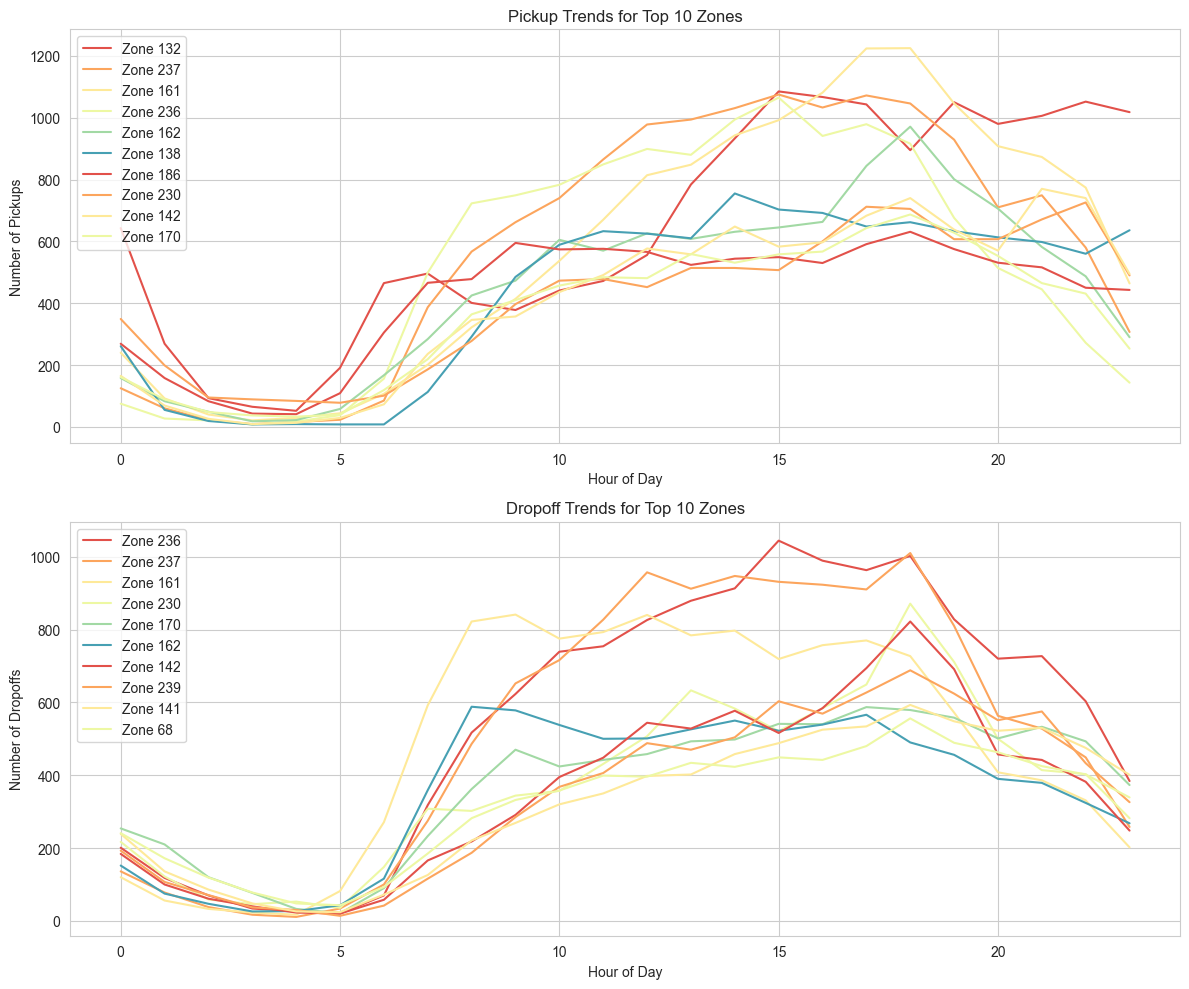

In [202]:
# Find top 10 pickup and dropoff zones
# Group by Pickup Hour and PULocationID
pickup_counts = taxi_data_zones_merged.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count')
taxi_data_zones_merged['dropoff_hour'] = pd.to_datetime(taxi_data_zones_merged['tpep_dropoff_datetime']).dt.hour
# Group by Dropoff Hour and DOLocationID
dropoff_counts = taxi_data_zones_merged.groupby(['dropoff_hour', 'DOLocationID']).size().reset_index(name='dropoff_count')

# Find top 10 pickup zones by total pickups
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index

# Find top 10 dropoff zones by total dropoffs
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# Filter data for these top zones
pickup_top_zones = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]
dropoff_top_zones = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot the pickup and dropoff trends for top 10 zones
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Pickup Trends for Top 10 Zones
for zone in top_pickup_zones:
    zone_data = pickup_top_zones[pickup_top_zones['PULocationID'] == zone]
    ax[0].plot(zone_data['pickup_hour'], zone_data['pickup_count'], label=f'Zone {zone}')

ax[0].set_title('Pickup Trends for Top 10 Zones')
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Number of Pickups')
ax[0].legend(loc='upper left')

# Dropoff Trends for Top 10 Zones
for zone in top_dropoff_zones:
    zone_data = dropoff_top_zones[dropoff_top_zones['DOLocationID'] == zone]
    ax[1].plot(zone_data['dropoff_hour'], zone_data['dropoff_count'], label=f'Zone {zone}')

ax[1].set_title('Dropoff Trends for Top 10 Zones')
ax[1].set_xlabel('Hour of Day')
ax[1].set_ylabel('Number of Dropoffs')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [204]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate total pickups per zone
pickup_total = pickup_counts.groupby('PULocationID')['pickup_count'].sum()

# Calculate total dropoffs per zone
dropoff_total = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum()

# Combine pickup and dropoff data for each zone into a single DataFrame
zone_data = pd.DataFrame({'total_pickups': pickup_total, 'total_dropoffs': dropoff_total})

# Fill missing values with 0 (zones with only pickups or only dropoffs)
zone_data.fillna(0, inplace=True)

# Avoid division by zero (replace 0 dropoffs with a small number)
zone_data['total_dropoffs'] = zone_data['total_dropoffs'].replace(0, 1)

# Calculate the pickup to dropoff ratio for each zone
zone_data['pickup_dropoff_ratio'] = zone_data['total_pickups'] / zone_data['total_dropoffs']

# Sort by pickup/dropoff ratio (high to low)
top_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Sort by pickup/dropoff ratio (low to high)
bottom_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# Display the top 10 and bottom 10 pickup/dropoff ratios
print("Top 10 Zones with the Highest Pickup/Dropoff Ratios:")
top_10_ratios


Top 10 Zones with the Highest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
70          1350.0             166              8.132530
132        15435.0            3554              4.342994
138        10215.0            3845              2.656697
186        10147.0            6682              1.518557
43          5053.0            3695              1.367524
249         6658.0            4879              1.364624
114         3880.0            2898              1.338854
162        10766.0            8560              1.257710
100         4868.0            4096              1.188477
161        13909.0           11718              1.186977

In [205]:
print("\nTop 10 Zones with the Lowest Pickup/Dropoff Ratios:")
bottom_10_ratios


Top 10 Zones with the Lowest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
265            0.0            1114                   0.0
57             0.0               1                   0.0
58             0.0              10                   0.0
59             0.0               1                   0.0
99             0.0               1                   0.0
111            0.0               3                   0.0
264            0.0             659                   0.0
156            0.0               2                   0.0
30             0.0               4                   0.0
176            0.0               1                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [207]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filter for night hours (11 PM to 5 AM)
night_hours = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 23) | (taxi_data_zones_merged['pickup_hour'] <= 5)]

# Group by PULocationID for pickups and DOLocationID for dropoffs
pickup_night_counts = night_hours.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_night_counts = night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge with taxi zone lookup to get zone names
pickup_night_counts = pickup_night_counts.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
dropoff_night_counts = dropoff_night_counts.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Sort to get the top 10 zones
top_pickup_zones_night = pickup_night_counts.sort_values(by='pickup_count', ascending=False).head(10)
top_dropoff_zones_night = dropoff_night_counts.sort_values(by='dropoff_count', ascending=False).head(10)

# Select only relevant columns for display
top_pickup_zones_night = top_pickup_zones_night.rename(columns={'zone_x': 'Zone', 'PULocationID_x': 'PULocationID'})
top_dropoff_zones_night = top_dropoff_zones_night.rename(columns={'zone_x': 'Zone', 'DOLocationID': 'DOLocationID'})
top_pickup_zones_night = top_pickup_zones_night[['Zone', 'borough', 'PULocationID', 'pickup_count']]
top_dropoff_zones_night = top_dropoff_zones_night[['Zone', 'borough', 'DOLocationID', 'dropoff_count']]
# Display results
print("Top 10 Night Pickup Zones:")
top_pickup_zones_night

Top 10 Night Pickup Zones:


Zone    borough  PULocationID  pickup_count
56                   East Village  Manhattan            79          2586
91                    JFK Airport     Queens           132          2331
180                  West Village  Manhattan           249          2084
31                   Clinton East  Manhattan            48          1689
105               Lower East Side  Manhattan           148          1610
79        Greenwich Village South  Manhattan           114          1389
164     Times Sq/Theatre District  Manhattan           230          1384
132  Penn Station/Madison Sq West  Manhattan           186          1146
117                 Midtown South  Manhattan           164          1016
96              LaGuardia Airport     Queens           138           996

In [208]:
top_dropoff_zones_night

Zone    borough  DOLocationID  dropoff_count
74            East Village  Manhattan            79           1383
44            Clinton East  Manhattan            48           1174
156            Murray Hill  Manhattan           170           1020
63            East Chelsea  Manhattan            68            972
97                Gramercy  Manhattan           107            953
129        Lenox Hill West  Manhattan           141            890
242         Yorkville West  Manhattan           263            855
228           West Village  Manhattan           249            765
216  Upper East Side North  Manhattan           236            751
84                Flatiron  Manhattan            90            743

<Figure size 960x720 with 0 Axes>

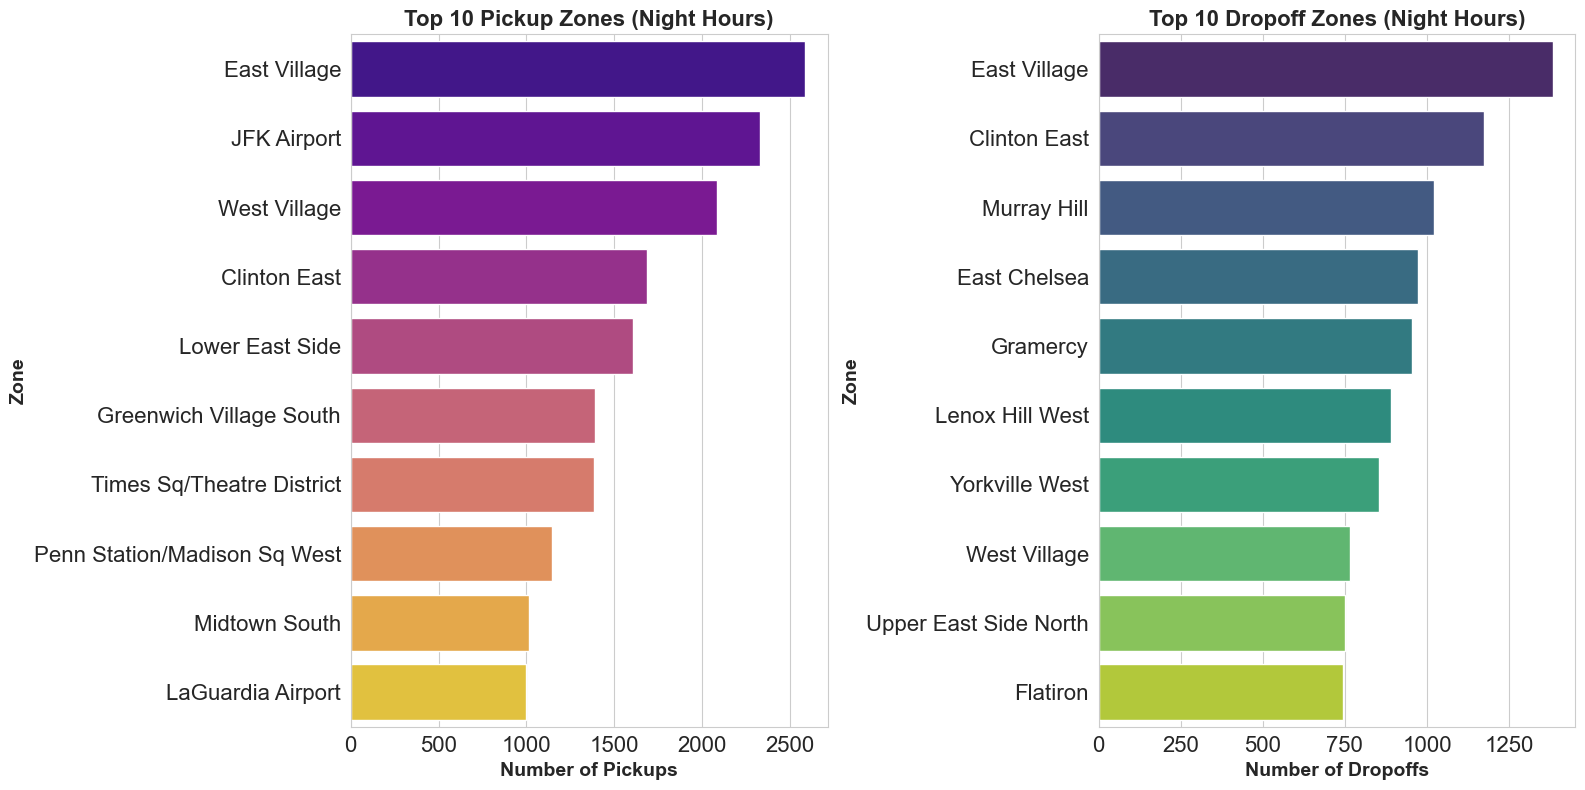

In [209]:
# Set plot style and increase figure quality
sns.set_style("whitegrid")
plt.figure(dpi=150)  # Increase DPI for better clarity

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Define font properties for better readability
title_font = {'fontsize': 16, 'fontweight': 'bold'}
label_font = {'fontsize': 14, 'fontweight': 'bold'}
tick_fontsize = 16

# Plot Pickup Zones
sns.barplot(data=top_pickup_zones_night, x='pickup_count', y='Zone', ax=axes[0], palette="plasma")
axes[0].set_title('Top 10 Pickup Zones (Night Hours)', **title_font)
axes[0].set_xlabel('Number of Pickups', **label_font)
axes[0].set_ylabel('Zone', **label_font)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)

# Plot Dropoff Zones
sns.barplot(data=top_dropoff_zones_night, x='dropoff_count', y='Zone', ax=axes[1], palette="viridis")
axes[1].set_title('Top 10 Dropoff Zones (Night Hours)', **title_font)
axes[1].set_xlabel('Number of Dropoffs', **label_font)
axes[1].set_ylabel('Zone', **label_font)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)

# Rotate Y-axis labels slightly for better readability
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [211]:
# Filter for night hours (11 PM to 5 AM)

# Night hours: 11 PM to 5 AM
night_hours_df = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 23) | (taxi_data_zones_merged['pickup_hour'] <= 5)]

# Day hours: 6 AM to 10 PM
day_hours_df = taxi_data_zones_merged[(taxi_data_zones_merged['pickup_hour'] >= 6) & (taxi_data_zones_merged['pickup_hour'] <= 22)]

# Calculate total revenue for night and day hours
total_revenue_night = night_hours_df['total_amount'].sum()
total_revenue_day = day_hours_df['total_amount'].sum()

# Calculate total revenue overall
total_revenue = taxi_data_zones_merged['total_amount'].sum()

# Calculate revenue share for night and day hours
night_revenue_share = total_revenue_night / total_revenue * 100
day_revenue_share = total_revenue_day / total_revenue * 100

print("night_revenue_share:-", night_revenue_share.round(2),"day_revenue_share:-", day_revenue_share.round(2))

night_revenue_share:- 12.29 day_revenue_share:- 87.71


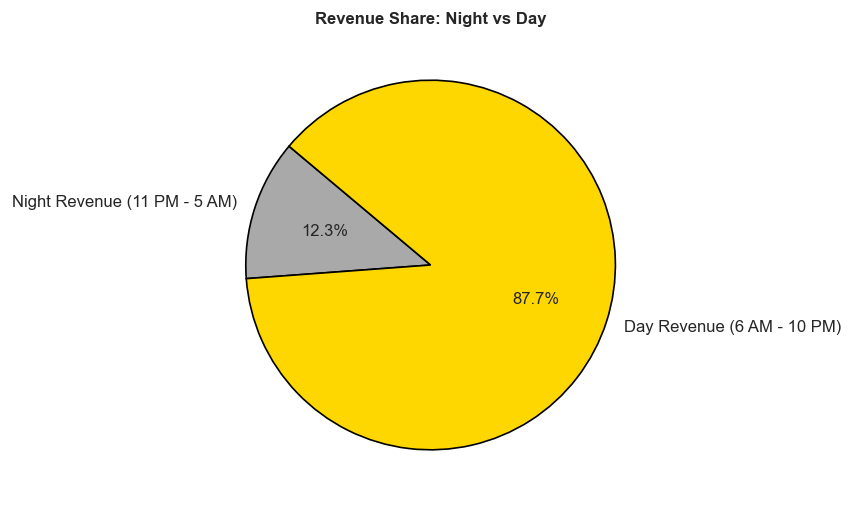

In [212]:
# Labels and values for the pie chart
labels = ['Night Revenue (11 PM - 5 AM)', 'Day Revenue (6 AM - 10 PM)']
values = [night_revenue_share, day_revenue_share]
colors = ['#A9A9A9', '#FFD700'] 

# Create a pie chart
plt.figure(figsize=(5, 5), dpi=120)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and styling
plt.title('Revenue Share: Night vs Day', fontsize=10, fontweight='bold')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

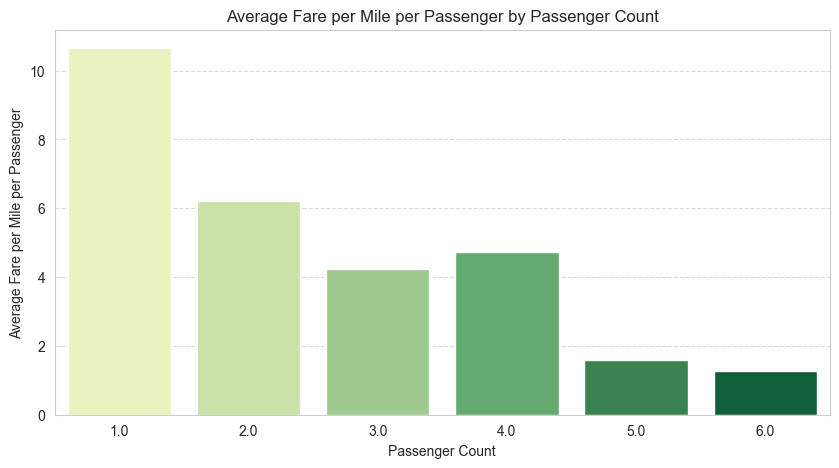

passenger_count  fare_per_mile_per_passenger
0              1.0                    10.653328
1              2.0                     6.217364
2              3.0                     4.223996
3              4.0                     4.726552
4              5.0                     1.579258
5              6.0                     1.276366

In [215]:
# Analyse the fare per mile per passenger for different passenger counts
# Filter out invalid trip distances
taxi_data_zones_merged = taxi_data_zones_merged.loc[taxi_data_zones_merged['trip_distance'] > 0].copy()

# Compute fare per mile and fare per mile per passenger
taxi_data_zones_merged['fare_per_mile'] = taxi_data_zones_merged['fare_amount'] / taxi_data_zones_merged['trip_distance']
taxi_data_zones_merged['fare_per_mile_per_passenger'] = (
    taxi_data_zones_merged['fare_per_mile'] / taxi_data_zones_merged['passenger_count']
)

# Group by passenger count and compute average fare per mile per passenger
avg_fare_per_mile_per_passenger = taxi_data_zones_merged.groupby('passenger_count', as_index=False).agg(
    {'fare_per_mile_per_passenger': 'mean'}
)

# **Plotting the results**
plt.figure(figsize=(10, 5))
sns.barplot(
    data=avg_fare_per_mile_per_passenger, 
    x='passenger_count', 
    y='fare_per_mile_per_passenger', 
    palette='YlGn'
)
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger")
plt.title("Average Fare per Mile per Passenger by Passenger Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()
avg_fare_per_mile_per_passenger

In [216]:
taxi_data_zones_merged.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_hour', 'pickup_day',
       'pickup_month', 'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'trip_duration_hours', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger'],
      dtype='object')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

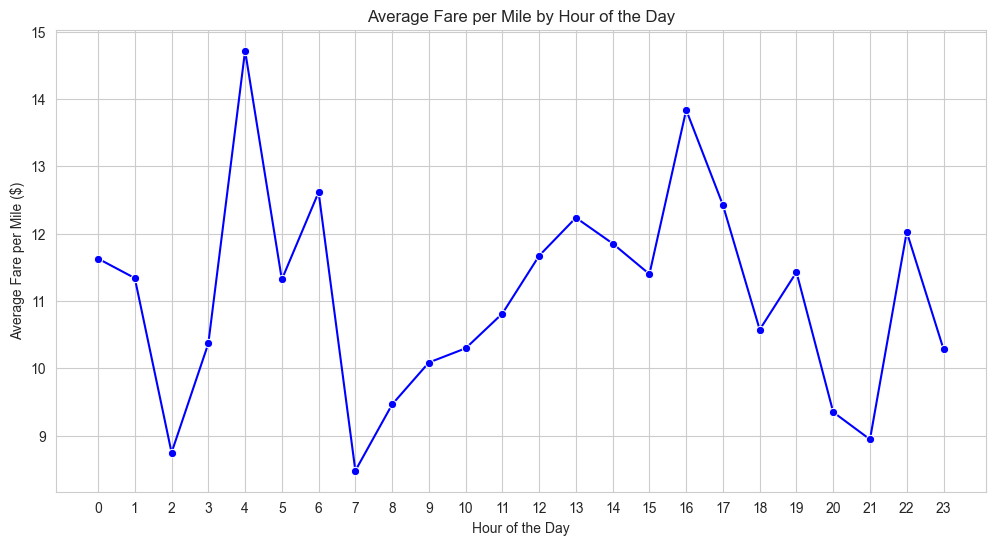

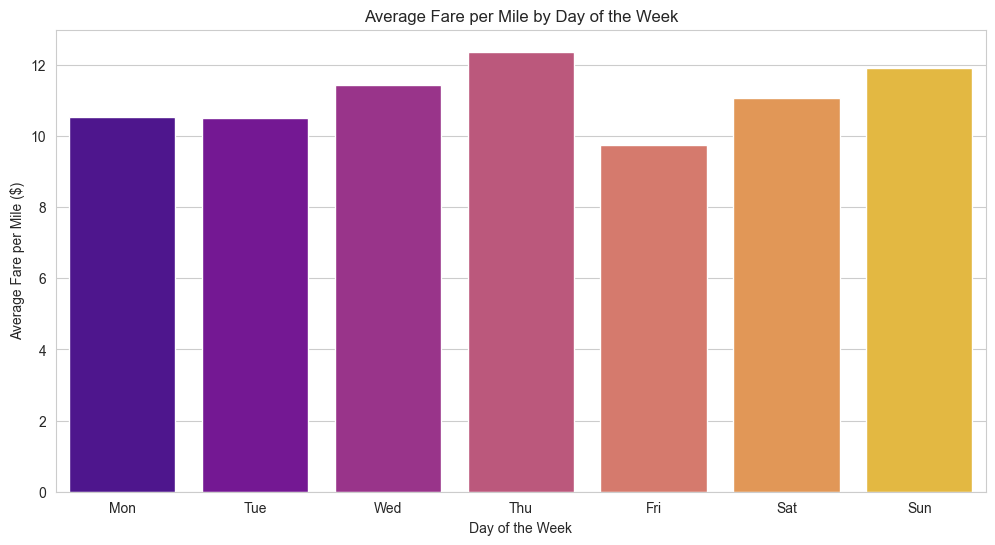

In [218]:
# Compare the average fare per mile for different days and for different times of the day

# Group by hour of the day and calculate average fare per mile
avg_fare_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['fare_per_mile'].mean()

# Group by day of the week and calculate average fare per mile
avg_fare_by_day = taxi_data_zones_merged.groupby('pickup_day')['fare_per_mile'].mean()

# Plot the average fare per mile by hour of day
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_fare_by_hour.index, y=avg_fare_by_hour.values, marker='o', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24), labels=[f"{i}" for i in range(0, 24)])
plt.show()

# Plot the average fare per mile by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_fare_by_day.index, y=avg_fare_by_day.values, palette="plasma")
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

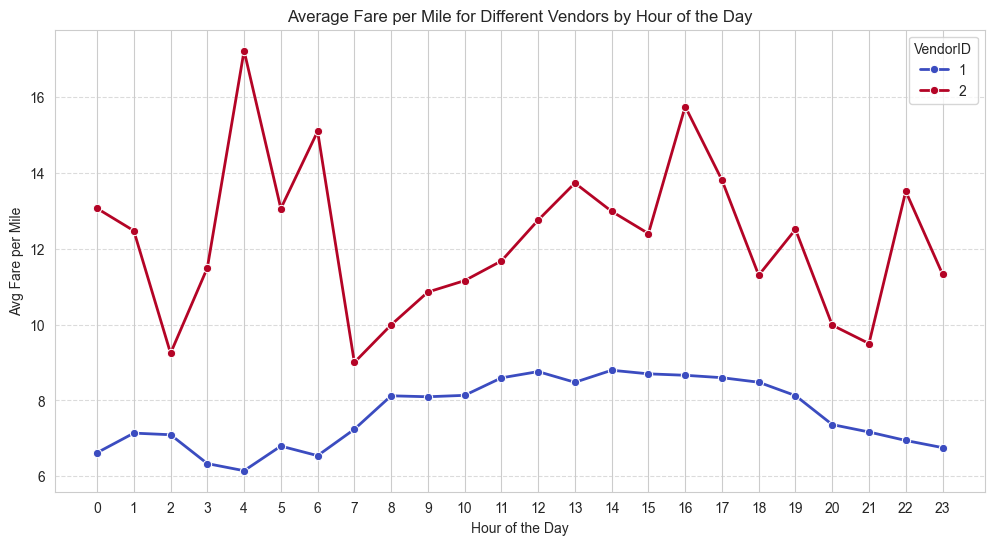

In [220]:
# Compare fare per mile for different vendors
fare_by_vendor_hour = taxi_data_zones_merged.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="pickup_hour", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_hour, 
    marker="o", palette="coolwarm", linewidth=2, ci=95  # Adding confidence interval
)

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors by Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dotted gridlines for better readability

plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


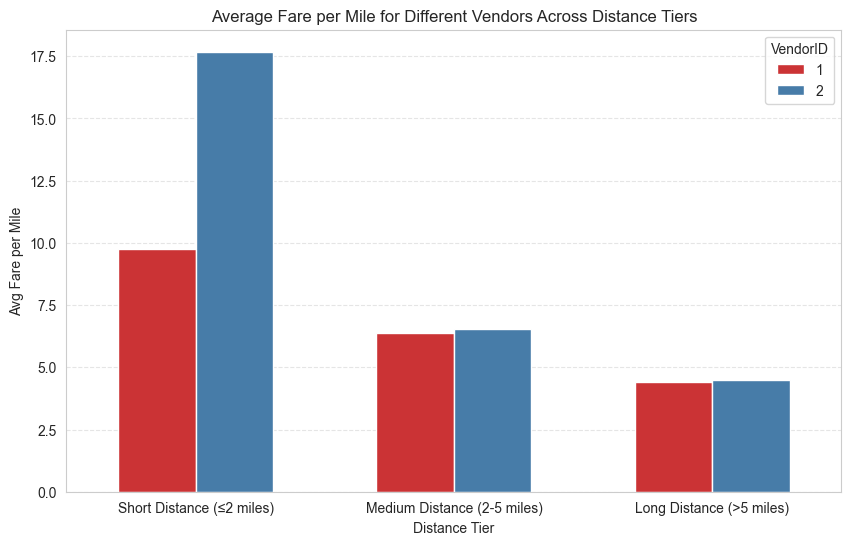

In [222]:
# Defining distance tiers

def categorize_distance(distance):
    if distance <= 2:
        return "Short Distance (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium Distance (2-5 miles)"
    else:
        return "Long Distance (>5 miles)"

# Apply categorization
taxi_data_zones_merged["distance_tier"] = taxi_data_zones_merged["trip_distance"].apply(categorize_distance)

# Ensure correct categorical order
distance_order = ["Short Distance (≤2 miles)", "Medium Distance (2-5 miles)", "Long Distance (>5 miles)"]
taxi_data_zones_merged["distance_tier"] = pd.Categorical(taxi_data_zones_merged["distance_tier"], categories=distance_order, ordered=True)

# Group by VendorID & Distance Tier
fare_by_vendor_tier = taxi_data_zones_merged.groupby(["VendorID", "distance_tier"], as_index=False).agg(
    {"fare_per_mile": "mean"}
)

# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="distance_tier", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_tier, palette="Set1", dodge=True, width = .6)

# Formatting
plt.xlabel("Distance Tier")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors Across Distance Tiers")
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [225]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
taxi_data_zones_merged['tip_percentage'] = (taxi_data_zones_merged['tip_amount'] / taxi_data_zones_merged['fare_amount']) * 100

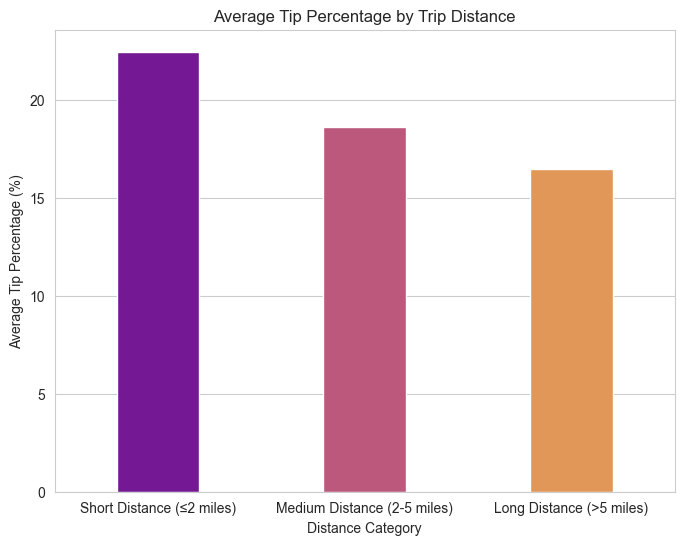

In [226]:
# Calculate the average tip percentage by distance category
avg_tip_by_distance = taxi_data_zones_merged.groupby('distance_tier')['tip_percentage'].mean().reset_index()


# Plot the average tip percentage by distance category
plt.figure(figsize=(8, 6))
sns.barplot(x="distance_tier", y="tip_percentage", data=avg_tip_by_distance, palette="plasma", width = .4)
plt.xlabel('Distance Category')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Trip Distance')
plt.xticks(rotation=0)
plt.show()

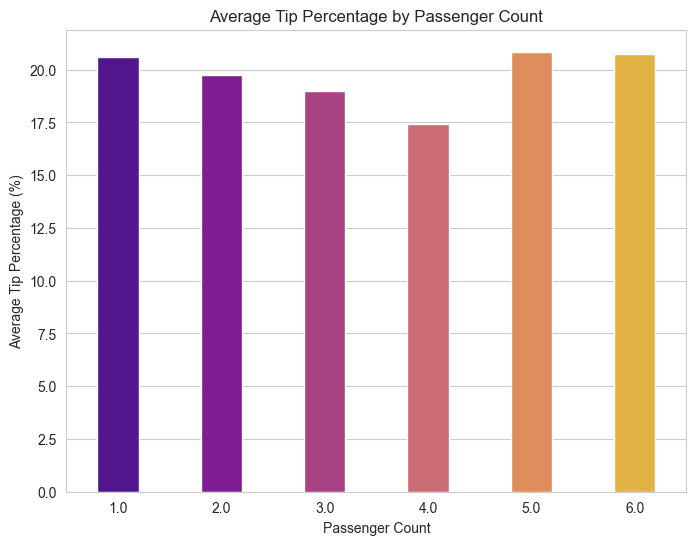

In [227]:
# Calculate the average tip percentage by passenger count
avg_tip_by_passenger_count = taxi_data_zones_merged.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Plot the average tip percentage by passenger count
plt.figure(figsize=(8, 6))
sns.barplot(x="passenger_count", y="tip_percentage", data=avg_tip_by_passenger_count, palette="plasma", width = .4)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Passenger Count')
plt.xticks(rotation=0)
plt.show()


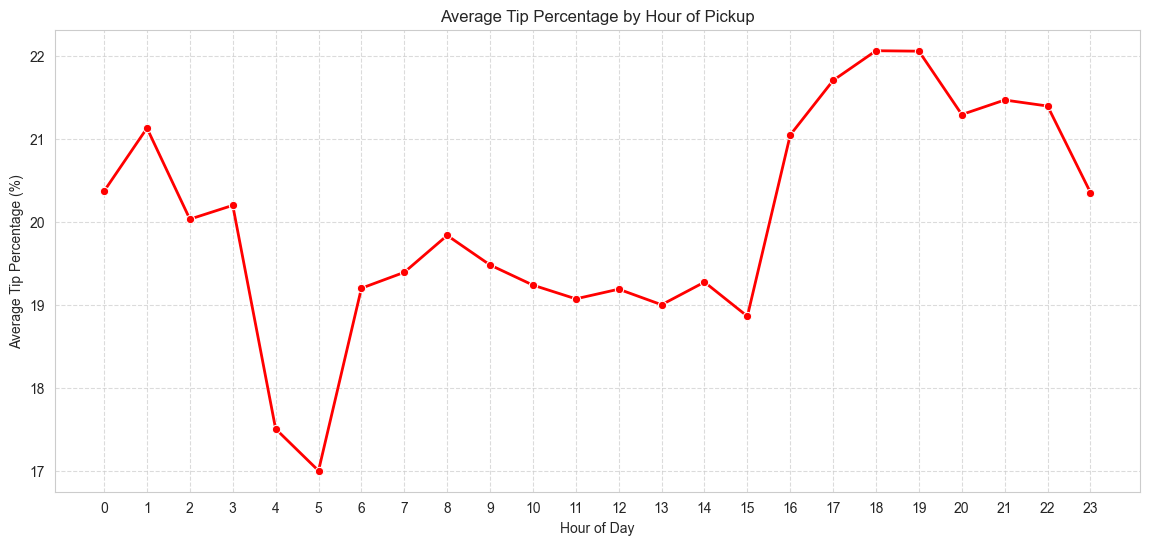

In [228]:
# Calculate the average tip percentage by hour of pickup
avg_tip_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Plot the average tip percentage by hour of the day
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_tip_by_hour, x="pickup_hour", y="tip_percentage", marker="o", color="red", linewidth=2)
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Hour of Pickup')
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [230]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Categorize trips into Low and High Tip groups
taxi_data_zones_merged['tip_category'] = np.where(
    taxi_data_zones_merged['tip_percentage'] < 10, 'Low Tip',
    np.where(taxi_data_zones_merged['tip_percentage'] > 25, 'High Tip', 'Medium Tip')
)

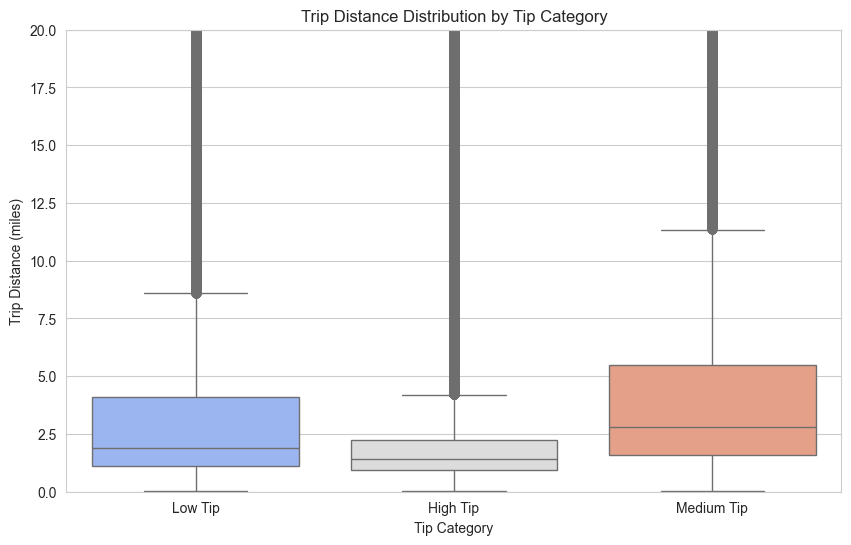

In [231]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tip_category', y='trip_distance', data=taxi_data_zones_merged, palette='coolwarm')
plt.xlabel("Tip Category")
plt.ylabel("Trip Distance (miles)")
plt.title("Trip Distance Distribution by Tip Category")
plt.ylim(0, 20)  # Focus on relevant range
plt.show()

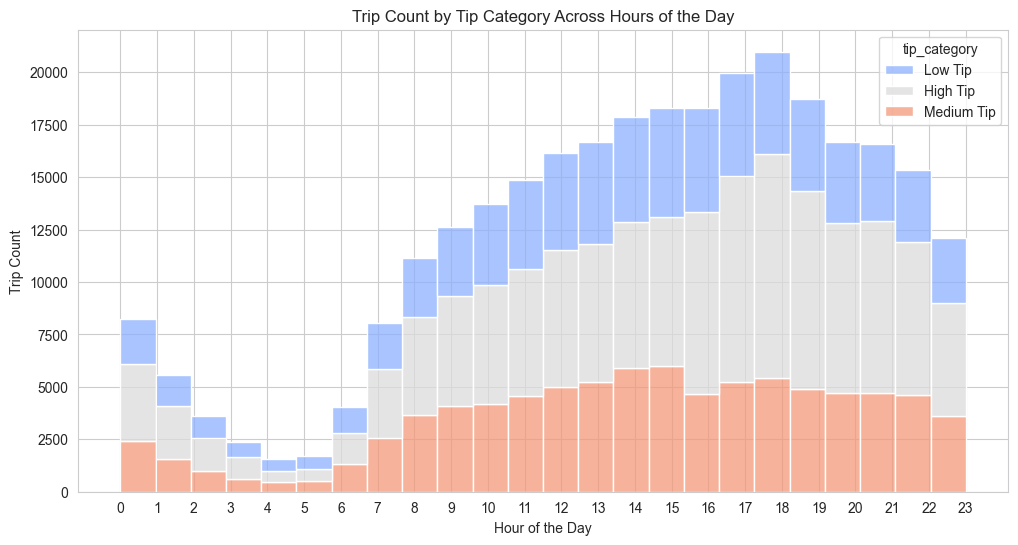

In [232]:
plt.figure(figsize=(12, 6))
sns.histplot(data=taxi_data_zones_merged, x='pickup_hour', hue='tip_category', multiple='stack', bins=24, palette='coolwarm')
plt.xlabel("Hour of the Day")
plt.ylabel("Trip Count")
plt.title("Trip Count by Tip Category Across Hours of the Day")
plt.xticks(range(0, 24))
plt.show()


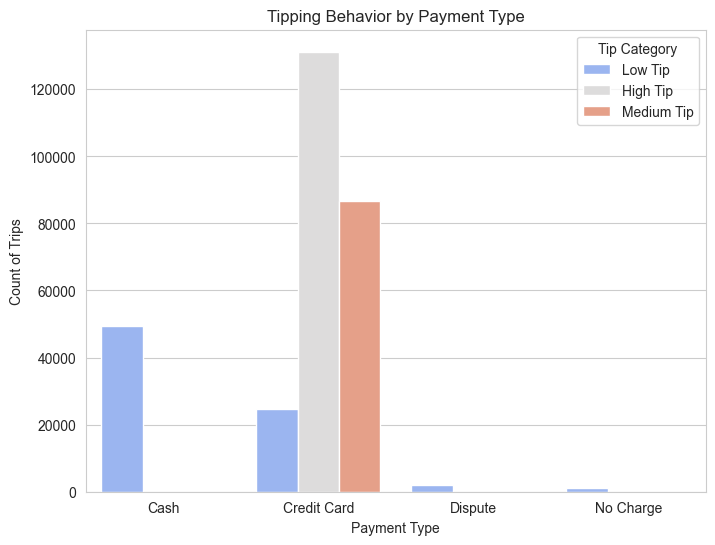

In [233]:
plt.figure(figsize=(8, 6))
sns.countplot(x="payment_type", hue="tip_category", data=taxi_data_zones_merged, palette="coolwarm")
plt.xlabel("Payment Type")
plt.ylabel("Count of Trips")
plt.title("Tipping Behavior by Payment Type")
plt.legend(title="Tip Category")
plt.show()


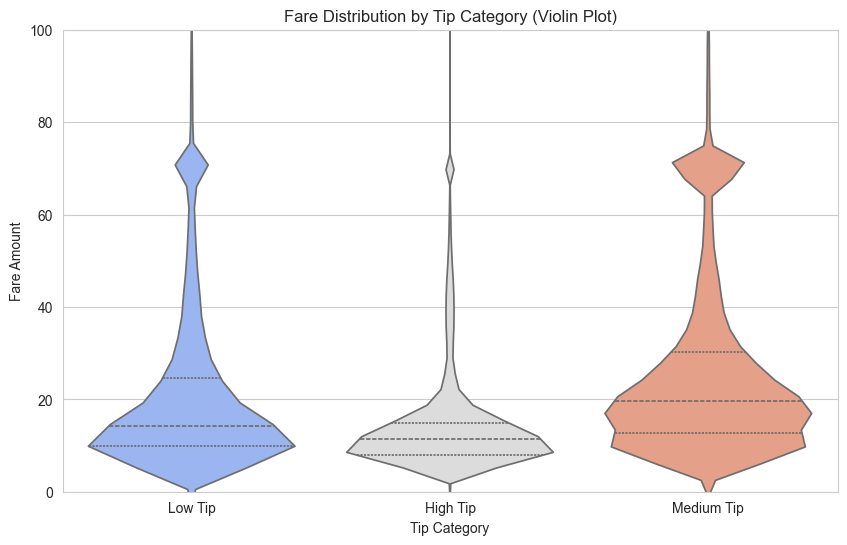

In [234]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='tip_category', y='fare_amount', data=taxi_data_zones_merged, palette='coolwarm', inner="quartile")
plt.xlabel("Tip Category")
plt.ylabel("Fare Amount")
plt.title("Fare Distribution by Tip Category (Violin Plot)")
plt.ylim(0, 100)  # Adjust if needed
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

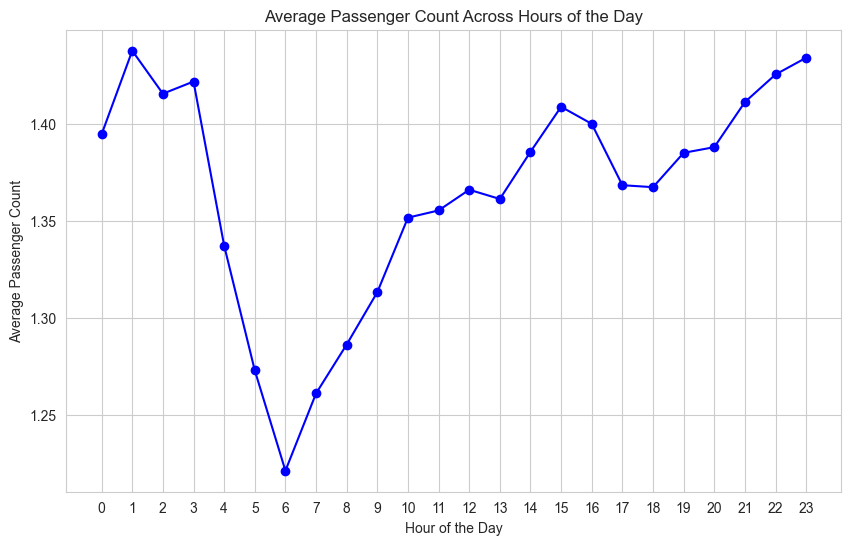

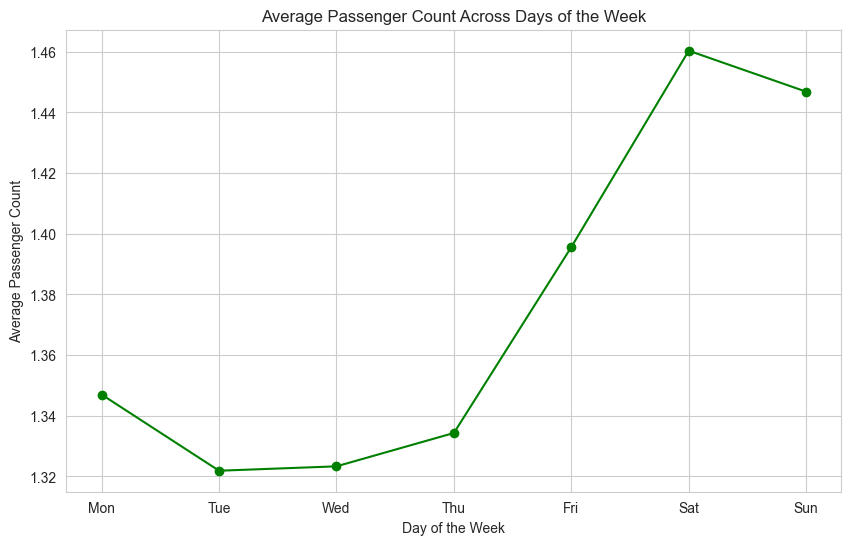

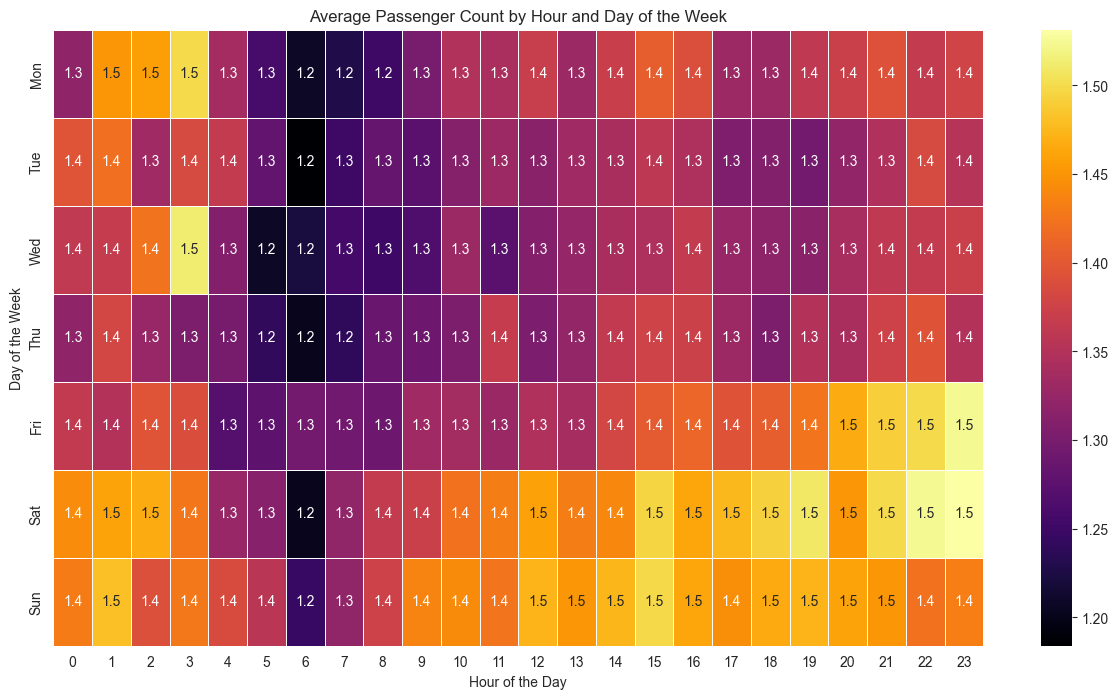

In [236]:
# See how passenger count varies across hours and days
# Group by hour of the day and calculate average passenger count
avg_passenger_by_hour = taxi_data_zones_merged.groupby('pickup_hour')['passenger_count'].mean()

# Group by day of the week and calculate average passenger count
avg_passenger_by_day = taxi_data_zones_merged.groupby('pickup_day')['passenger_count'].mean()

passenger_heatmap = taxi_data_zones_merged.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()

# Plot the variation of passenger count across hours of the day
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_by_hour.index, avg_passenger_by_hour.values, marker='o', color='b')
plt.title('Average Passenger Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))  # Set x-ticks to represent hours of the day (0-23)
plt.grid(True)
plt.show()

# Plot the variation of passenger count across days of the week
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_by_day.index, avg_passenger_by_day.values, marker='o', color='g')
plt.title('Average Passenger Count Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 7), days_of_week)  # Set x-ticks to represent days of the week
plt.grid(True)
plt.show()

#Heatmap - Passenger Count by Hour & Day
plt.figure(figsize=(15, 8))
sns.heatmap(passenger_heatmap, cmap="inferno", annot=True, fmt=".1f", linewidths=0.5, xticklabels=range(0, 24), yticklabels=days_of_week)
plt.title("Average Passenger Count by Hour and Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

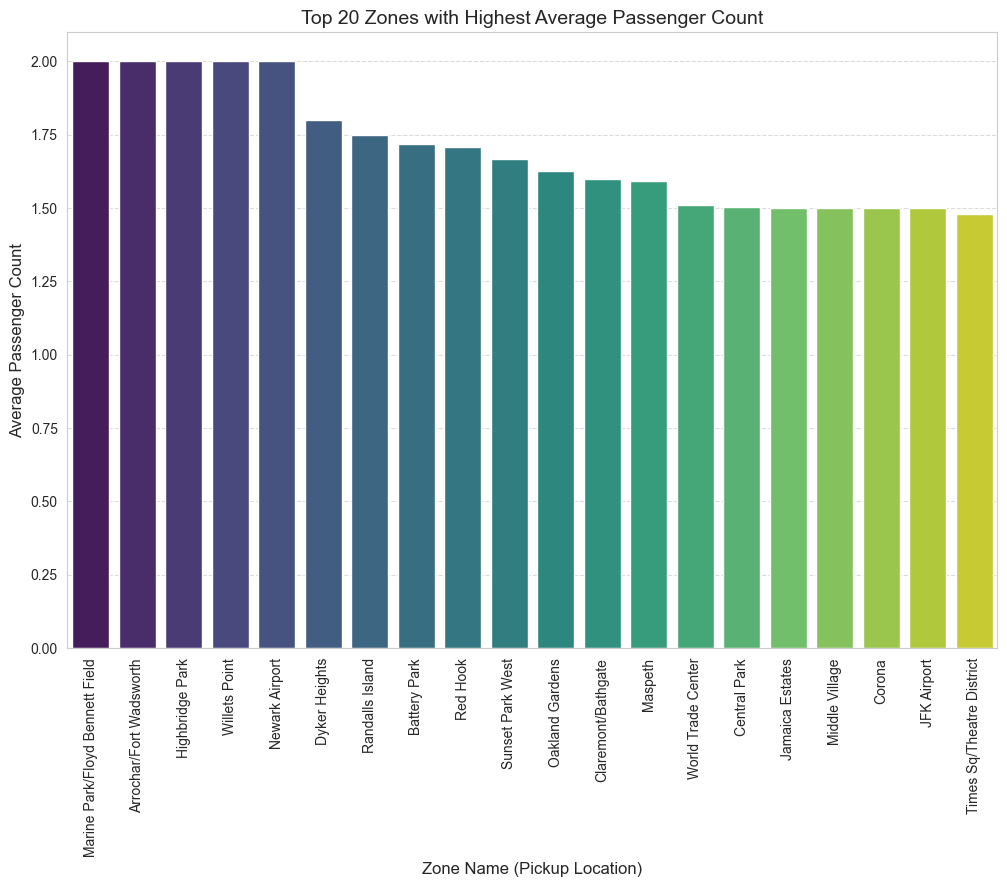

In [238]:
# How does passenger count vary across zones
# Group by 'zone' and calculate average passenger count
avg_passenger_by_zone = taxi_data_zones_merged.groupby('zone')['passenger_count'].mean()

# Sort in descending order for better visualization
avg_passenger_by_zone_sorted = avg_passenger_by_zone.sort_values(ascending=False).reset_index()

# **Plot top 20 zones with highest average passenger count**
plt.figure(figsize=(12, 8))
sns.barplot(x="zone", y="passenger_count", data=avg_passenger_by_zone_sorted.head(20), palette="viridis")

# Formatting
plt.title("Top 20 Zones with Highest Average Passenger Count", fontsize=14)
plt.xlabel("Zone Name (Pickup Location)", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


In [239]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

taxi_data_zones_merged.columns.to_list()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'quarter',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'trip_duration_hours',
 'dropoff_hour',
 'fare_per_mile',
 'fare_per_mile_per_passenger',
 'distance_tier',
 'tip_percentage',
 'tip_category']

In [240]:
# Drop duplicate columns
taxi_data_zones_merged = taxi_data_zones_merged.drop(columns=['LocationID_dropoff', 'zone_dropoff'], errors='ignore')

# Verify that the columns are removed
print(taxi_data_zones_merged.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_hour', 'pickup_day',
       'pickup_month', 'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'trip_duration_hours', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'distance_tier', 'tip_percentage',
       'tip_category'],
      dtype='object')


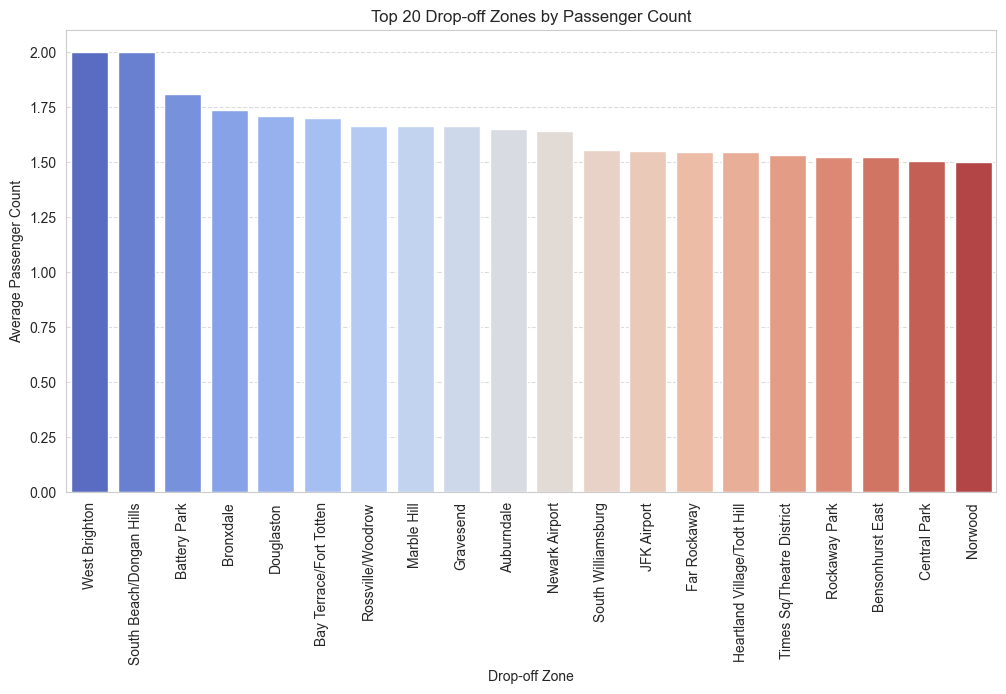

In [241]:
# Create a mapping of LocationID to Zone Name
location_to_zone = taxi_data_zones_merged[['LocationID', 'zone']].drop_duplicates()

# Merge drop-off location names into the dataset
taxi_data_zones_merged = taxi_data_zones_merged.merge(location_to_zone, left_on="DOLocationID", right_on="LocationID", how="left", suffixes=("", "_dropoff"))
# Group by Drop-off Zone Name instead of ID
avg_passenger_by_dropoff = taxi_data_zones_merged.groupby("zone_dropoff")["passenger_count"].mean().reset_index()

# Sort in descending order
avg_passenger_by_dropoff_sorted = avg_passenger_by_dropoff.sort_values(by="passenger_count", ascending=False)

# Plot top 20 drop-off zones
plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="passenger_count", data=avg_passenger_by_dropoff_sorted.head(20), palette="coolwarm")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 20 Drop-off Zones by Passenger Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

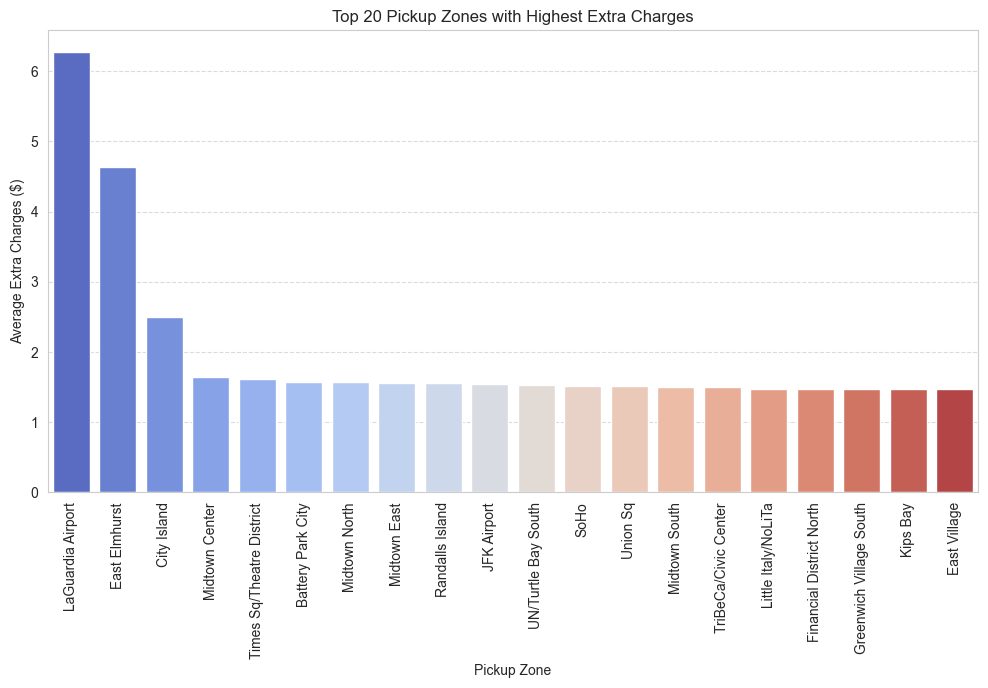

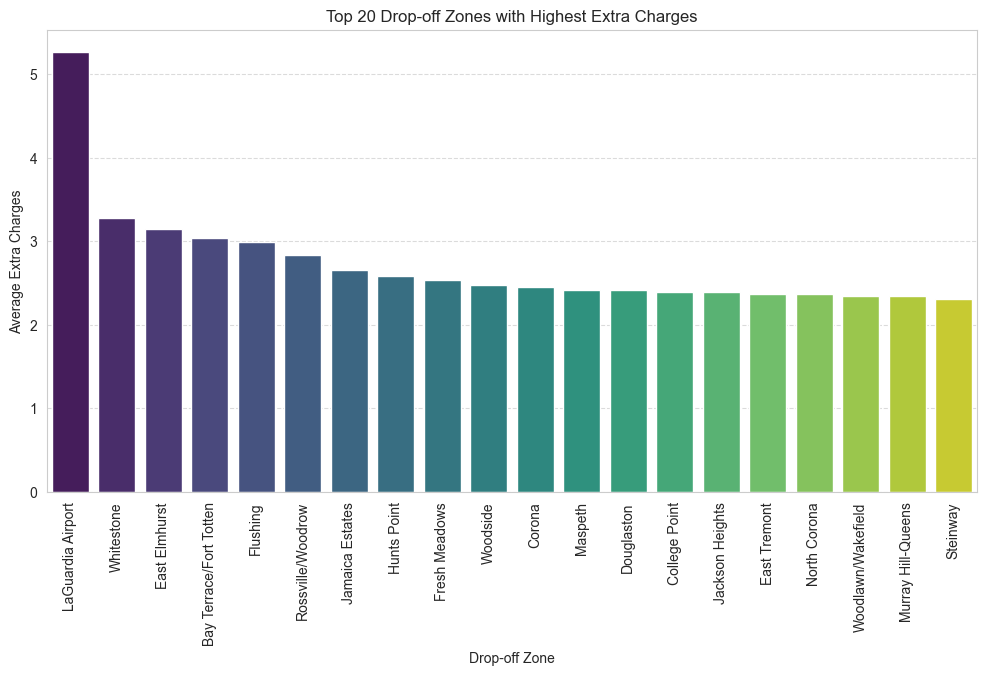

In [244]:
# How often is each surcharge applied?
# Calculate total extra charges per pickup zone
extra_by_pickup = taxi_data_zones_merged.groupby("zone")["extra"].mean().reset_index()

# Sort in descending order
extra_by_pickup_sorted = extra_by_pickup.sort_values(by="extra", ascending=False)

# Plot top 20 zones with highest extra charges
plt.figure(figsize=(12, 6))
sns.barplot(x="zone", y="extra", data=extra_by_pickup_sorted.head(20), palette="coolwarm")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Extra Charges ($)")
plt.title("Top 20 Pickup Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Repeat for drop-off zones
extra_by_dropoff = taxi_data_zones_merged.groupby("zone_dropoff")["extra"].mean().reset_index()
extra_by_dropoff_sorted = extra_by_dropoff.sort_values(by="extra", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="extra", data=extra_by_dropoff_sorted.head(20), palette="viridis")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Extra Charges")
plt.title("Top 20 Drop-off Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


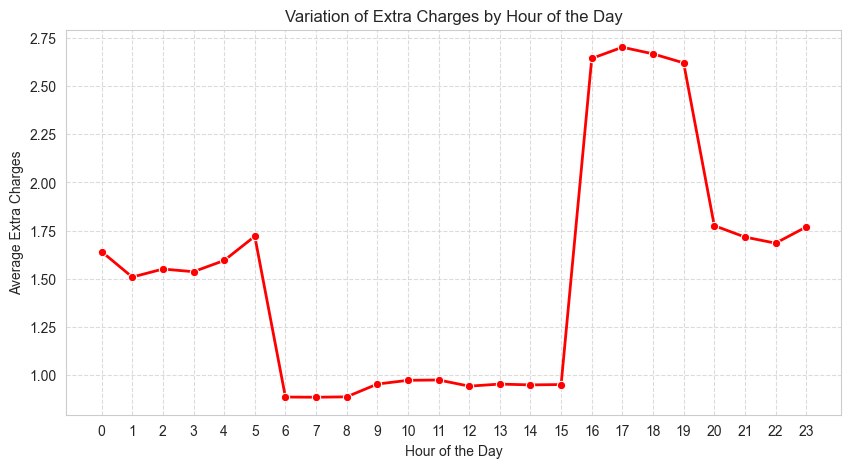

In [245]:
# Group by hour of the day and calculate average extra charges
extra_by_hour = taxi_data_zones_merged.groupby("pickup_hour")["extra"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=extra_by_hour, x="pickup_hour", y="extra", marker="o", color="r", linewidth=2)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charges")
plt.title("Variation of Extra Charges by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


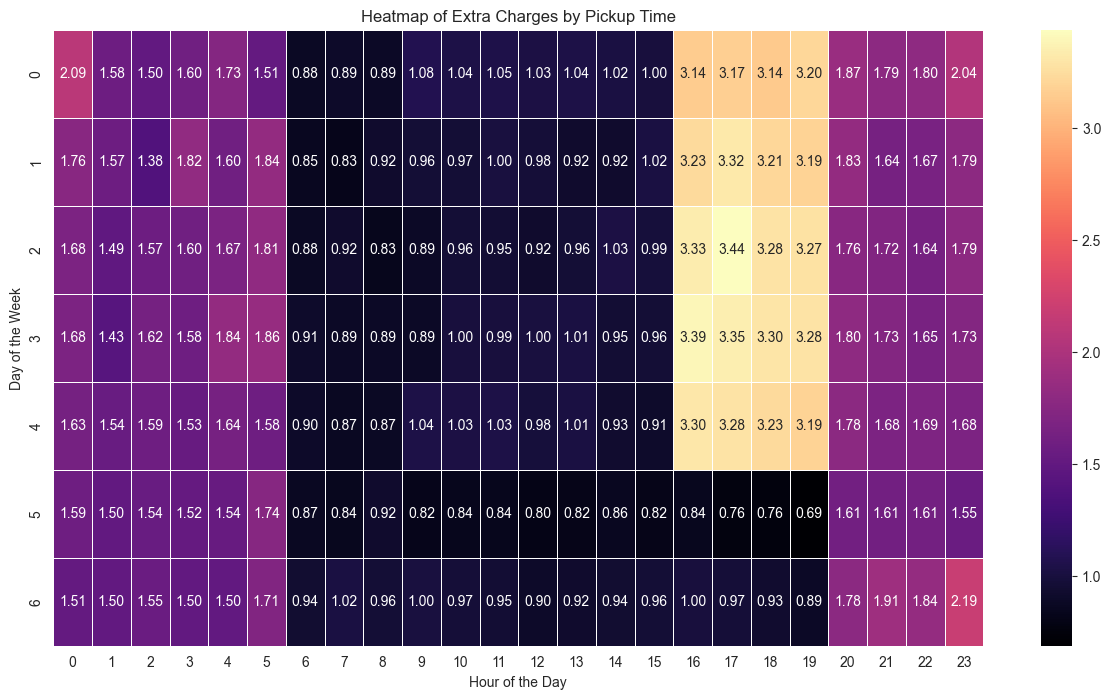

In [246]:
# Group by pickup day and hour to calculate average extra charges
extra_heatmap_data = taxi_data_zones_merged.groupby(["pickup_day", "pickup_hour"])["extra"].mean().unstack()

# Create heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(extra_heatmap_data, cmap="magma", annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Extra Charges by Pickup Time")
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

__*Recommendations to Optimize Routing and Dispatching:*__

1. Time-Based Route Optimization
   - Avoid congested areas during 8-10 AM where average speed drops to 7.72 mph
   - Utilize alternative routes during evening peak (4-7 PM) when speeds average 8.42 mph
   - Take advantage of faster travel times during off-peak hours (average 8.62 mph at noon)

2. Distance-Based Efficiency
   - Focus on short trips (0-2 miles) during peak hours for maximum efficiency
   - Optimize long-distance routes (5+ miles) for airport runs
   - Plan routes to minimize empty returns, especially for airport trips

3. Peak Hour Management
   - Highest demand at 6 PM (18,751 trips) requires efficient route planning
   - Morning peak (7-10 AM) needs strategic positioning near business districts
   - Late night (11 PM-5 AM) requires focus on entertainment districts

4. Operational Improvements
   - Monitor and avoid slowest routes (e.g., Midtown South to Garment District: 4.33 mph)
   - Utilize data on inter-borough travel patterns for better route planning
   - Implement real-time traffic monitoring for dynamic route adjustments

5. Zone-Based Routing
   - Prioritize high-volume zones (JFK Airport: 13,638 trips)
   - Optimize routes between popular zone pairs
   - Create efficient coverage patterns for Manhattan (88.36% of all pickups)

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

__*Strategic Positioning Recommendations:*__

1. Time-Based Positioning
   - Morning (7-10 AM): Position near residential areas like Upper East Side
   - Midday (11 AM-3 PM): Focus on business districts and shopping areas
   - Evening (4-7 PM): Concentrate around office areas and transport hubs
   - Night (11 PM-5 AM): Position near entertainment districts (12.1% of revenue)

2. Zone-Based Distribution
   High-Priority Zones (based on trip volume):
   - JFK Airport (13,638 trips)
   - Upper East Side South (12,341 trips)
   - Midtown Center (12,269 trips)
   - Upper East Side North (11,083 trips)
   - LaGuardia Airport (9,018 trips)

3. Weekly Pattern Optimization
   Weekdays:
   - Business districts during rush hours
   - Airport coverage during off-peak
   
   Weekends:
   - Entertainment districts
   - Shopping areas
   - Tourist locations

4. Seasonal Adjustments
   - Q2 (26.67% revenue): Increase coverage
   - Q3 (22.77% revenue): Adjust for lower demand
   - Q4 (27.02% revenue): Maximum deployment

5. Special Event Considerations
   - Monitor and adjust for local events
   - Coordinate with airport schedules
   - Account for weather conditionsations__

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Data-Driven Pricing Strategy Adjustments:

1. Distance-Based Price Structure
---------------------------------------
SHORT TRIPS (0-2 miles)
* Rate: $9.49 per mile
* Best for: Local travel, business district trips

MEDIUM TRIPS (2-5 miles)
* Rate: $6.28 per mile
* Best for: Inter-borough, cross-town travel

LONG TRIPS (5+ miles)
* Rate: $4.46 per mile
* Best for: Airport runs, outer borough service

2. Time-Based Pricing
---------------------------------------
PEAK HOURS (4-7 PM)
* Implement surge pricing
* Monitor competitor rates
* Adjust based on demand

BUSINESS HOURS (9 AM-5 PM)
* Standard rate plus congestion charge
* Corporate client rates
* Volume-based discounts

LATE NIGHT SERVICE
* Special rate structure
* Safety premium
* Guaranteed service fee

3. Zone-Based Pricing
---------------------------------------
MANHATTAN BUSINESS DISTRICT
* Premium rates during peak hours
* Corporate account options
* Regular client discounts

AIRPORT SERVICE
* Fixed rate packages
* Terminal-specific pricing
* Flight delay adjustment rates

4. Special Condition Adjustments
---------------------------------------
* Congestion pricing (89.3% trips affected)
* Weather condition surcharges
* Special event rates

5. Payment Incentives
---------------------------------------
* Card payment bonuses
* Loyalty program benefits
* Corporate account rateslty program benefits
   * Corporate account rateslty program benefits
   * Corporate account rateslty program benefits
   * Corporate account rates Loyalty program benefits
   * Corporate account rates